# Analyzing Genre Influence on IMDb Ratings for Film and TV

(v1.0) - October 2024

This project aims to explore the relationship between film genres and their IMDb ratings to provide insights into genre success for a hypothetical film studio.

### Sources

This data comes from IMDb's Non-Commercial Datasets, including:
- title_basics: Title information.
- title_ratings: IMDb rating and number of votes. 
- title_principals: Information on directors, writers, and key actors. 
- title_akas: Alternative title information.
- title_crew: Names for crew.
- title_episode: Episode and season numbers.
- name_basics: Key names involved with the titles.

## 1. Data Cleaning and Preparation Process

### 1.1 Loaded data.

First, I imported necessary libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings("ignore")

Then, imported raw data sets from CSV files and used head() to preview the data frames.

In [7]:
title_basics = pd.read_csv('...title_basics.csv', sep=',', low_memory=False)
title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893,\N,1,"Comedy,Short"


In [8]:
title_akas = pd.read_csv('...title_akas.csv', sep=',', low_memory=False)
title_akas.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita,\N,\N,original,\N,1
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita,US,\N,imdbDisplay,\N,0
3,tt0000001,4,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
4,tt0000001,5,Καρμενσίτα,GR,\N,imdbDisplay,\N,0


In [9]:
title_crew = pd.read_csv('...title_crew.csv', sep=',', low_memory=False)
title_crew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [10]:
title_episode = pd.read_csv('...title_episode.csv', sep=',', low_memory=False)
title_episode.head()

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0031458,tt32857063,\N,\N
1,tt0041951,tt0041038,1,9
2,tt0042816,tt0989125,1,17
3,tt0042889,tt0989125,\N,\N
4,tt0043426,tt0040051,3,42


In [11]:
title_principals = pd.read_csv('...title_principals.csv', sep=',', low_memory=False)
title_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0005690,producer,producer,\N
3,tt0000001,4,nm0374658,cinematographer,director of photography,\N
4,tt0000002,1,nm0721526,director,\N,\N


In [12]:
title_ratings = pd.read_csv('...title_ratings.csv', sep=',', low_memory=False)
title_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2089
1,tt0000002,5.6,283
2,tt0000003,6.5,2096
3,tt0000004,5.4,183
4,tt0000005,6.2,2832


In [13]:
name_basics = pd.read_csv('...name_basics.csv', sep=',', low_memory=False)
name_basics.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0053137,tt0027125"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0083922,tt0050976,tt0069467"


### 1.2 Duplicated data frames for cleaning.

In [15]:
raw_dfs = ['title_basics', 'title_akas', 'title_crew', 'title_episode', 'title_principals','title_ratings','name_basics']

In [16]:
for df_name in raw_dfs:
    globals()[f"{df_name}_clean"] = globals()[df_name].copy()

Next, I confirmed successful duplication and reviewed data structure.

In [18]:
print(title_basics_clean.shape)
title_basics_clean.head()

(11127675, 9)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893,\N,1,"Comedy,Short"


In [19]:
print(title_akas_clean.shape)
title_akas_clean.head()

(47171461, 8)


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita,\N,\N,original,\N,1
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita,US,\N,imdbDisplay,\N,0
3,tt0000001,4,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
4,tt0000001,5,Καρμενσίτα,GR,\N,imdbDisplay,\N,0


In [20]:
print(title_crew_clean.shape)
title_crew_clean.head()

(10471271, 3)


,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [21]:
print(title_episode_clean.shape)
title_episode_clean.head()

(8538187, 4)


,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0031458,tt32857063,\N,\N
1,tt0041951,tt0041038,1,9
2,tt0042816,tt0989125,1,17
3,tt0042889,tt0989125,\N,\N
4,tt0043426,tt0040051,3,42


In [22]:
print(title_principals_clean.shape)
title_principals_clean.head()

(86305808, 6)


,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0005690,producer,producer,\N
3,tt0000001,4,nm0374658,cinematographer,director of photography,\N
4,tt0000002,1,nm0721526,director,\N,\N


In [23]:
print(title_ratings_clean.shape)
title_ratings_clean.head()

(1482511, 3)


,tconst,averageRating,numVotes
0,tt0000001,5.7,2089
1,tt0000002,5.6,283
2,tt0000003,6.5,2096
3,tt0000004,5.4,183
4,tt0000005,6.2,2832


In [24]:
print(name_basics_clean.shape)
name_basics_clean.head()

(13846512, 6)


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0053137,tt0027125"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0083922,tt0050976,tt0069467"


### 1.3 Resolved null values using isnull(), fillna(), and dropna().

In [27]:
title_basics.isnull().sum() # Identified columns with null values

tconst              0
titleType           0
primaryTitle       19
originalTitle      19
isAdult             1
startYear           0
endYear             0
runtimeMinutes      0
genres            637
dtype: int64

In [28]:
title_basics_clean = title_basics_clean.dropna(subset=['isAdult']) # Dropped title with null value in isAdult column
title_basics_clean.fillna({'primaryTitle': 'Unknown', 'originalTitle': 'Unknown', 'genres': 'Unknown'}, inplace=True) # Replaced string nulls
title_basics_clean.isnull().sum() # Confirmed changes

tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            0
dtype: int64

In [29]:
title_akas.isnull().sum()

titleId              0
ordering             0
title               36
region             176
language             0
types                0
attributes           0
isOriginalTitle      0
dtype: int64

In [30]:
title_akas_clean.fillna({'title': 'Unknown', 'region': 'Unknown'}, inplace=True)
title_akas_clean.isnull().sum() # Confirmed changes

titleId            0
ordering           0
title              0
region             0
language           0
types              0
attributes         0
isOriginalTitle    0
dtype: int64

In [31]:
name_basics.isnull().sum()

nconst               0
primaryName          8
birthYear            0
deathYear            0
primaryProfession    0
knownForTitles       0
dtype: int64

In [32]:
name_basics_clean['primaryName'] = name_basics_clean['primaryName'].fillna('Unknown')
name_basics_clean.isnull().sum() # Confirmed changes

nconst               0
primaryName          0
birthYear            0
deathYear            0
primaryProfession    0
knownForTitles       0
dtype: int64

In [33]:
title_crew_clean.isnull().sum() # Confirmed no null values

tconst       0
directors    0
writers      0
dtype: int64

In [34]:
title_episode_clean.isnull().sum() # Confirmed no null values

tconst           0
parentTconst     0
seasonNumber     0
episodeNumber    0
dtype: int64

In [35]:
title_principals.isnull().sum()

tconst        0
ordering      0
nconst        0
category      0
job           0
characters    3
dtype: int64

In [36]:
title_principals_clean['characters'] = title_principals_clean['characters'].fillna('None')
title_principals_clean.isnull().sum() # Confirmed changes

tconst        0
ordering      0
nconst        0
category      0
job           0
characters    0
dtype: int64

In [37]:
title_ratings_clean.isnull().sum()  # Confirmed no null values

tconst           0
averageRating    0
numVotes         0
dtype: int64

### 1.4 Converted data types.

In [39]:
title_basics_clean['tconst'] = title_basics_clean['tconst'].astype(str)
title_basics_clean['titleType'] = title_basics_clean['titleType'].astype(str)
title_basics_clean['primaryTitle'] = title_basics_clean['primaryTitle'].astype(str)
title_basics_clean['originalTitle'] = title_basics_clean['originalTitle'].astype(str)
title_basics_clean['isAdult'] = title_basics_clean['isAdult'].astype(bool)
title_basics_clean['startYear'] = pd.to_datetime(title_basics_clean['startYear'], format='%Y', errors='coerce')
title_basics_clean['endYear'] = pd.to_datetime(title_basics_clean['endYear'], format='%Y', errors='coerce')
title_basics_clean['runtimeMinutes'] = pd.to_numeric(title_basics_clean['runtimeMinutes'], errors='coerce') 
title_basics_clean['genres'] = title_basics_clean['genres'].astype(str)
print(title_basics_clean.dtypes)

tconst                    object
titleType                 object
primaryTitle              object
originalTitle             object
isAdult                     bool
startYear         datetime64[ns]
endYear           datetime64[ns]
runtimeMinutes           float64
genres                    object
dtype: object


The runtimeMinutes column was converted to numeric to coerce non-numerical errors into an acceptable format.

In [41]:
title_akas_clean['titleId'] = title_akas_clean['titleId'].astype(str)
title_akas_clean['ordering'] = title_akas_clean['ordering'].astype(int)
title_akas_clean['title'] = title_akas_clean['title'].astype(str)
title_akas_clean['region'] = title_akas_clean['region'].astype(str)
title_akas_clean['language'] = title_akas_clean['language'].astype(str)
title_akas_clean['types'] = title_akas_clean['types'].astype(str)
title_akas_clean['attributes'] = title_akas_clean['attributes'].astype(str)
title_akas_clean['isOriginalTitle'] = title_akas_clean['isOriginalTitle'].astype(bool)
print(title_akas_clean.dtypes)

titleId            object
ordering            int64
title              object
region             object
language           object
types              object
attributes         object
isOriginalTitle      bool
dtype: object


In [42]:
title_crew_clean['tconst'] = title_crew_clean['tconst'].astype(str)
title_crew_clean['directors'] = title_crew_clean['directors'].astype(str)
title_crew_clean['writers'] = title_crew_clean['writers'].astype(str)
print(title_crew_clean.dtypes)

tconst       object
directors    object
writers      object
dtype: object


In [43]:
title_episode_clean = title_episode_clean.replace(["\\N", "\\\\N"], 0) # Replaced \N and \\N strings with 0 due to error
title_episode_clean['tconst'] = title_episode_clean['tconst'].astype(str)
title_episode_clean['parentTconst'] = title_episode_clean['parentTconst'].astype(str)
title_episode_clean['seasonNumber'] = title_episode_clean['seasonNumber'].astype(int)
title_episode_clean['episodeNumber'] = title_episode_clean['episodeNumber'].astype(int)
print(title_episode_clean.dtypes)

tconst           object
parentTconst     object
seasonNumber      int64
episodeNumber     int64
dtype: object


In [44]:
title_principals_clean['tconst'] = title_principals_clean['tconst'].astype(str)
title_principals_clean['ordering'] = title_principals_clean['ordering'].astype(int)
title_principals_clean['nconst'] = title_principals_clean['nconst'].astype(str)
title_principals_clean['category'] = title_principals_clean['category'].astype(str)
title_principals_clean['job'] = title_principals_clean['job'].astype(str)
title_principals_clean['characters'] = title_principals_clean['characters'].astype(str)
print(title_principals_clean.dtypes)

tconst        object
ordering       int64
nconst        object
category      object
job           object
characters    object
dtype: object


In [45]:
title_ratings_clean['tconst'] = title_ratings_clean['tconst'].astype(str)
title_ratings_clean['averageRating'] = pd.to_numeric(title_ratings_clean['averageRating'], errors='coerce')
title_ratings_clean['numVotes'] = title_ratings_clean['numVotes'].astype(int)
print(title_ratings_clean.dtypes)

tconst            object
averageRating    float64
numVotes           int64
dtype: object


In [46]:
name_basics_clean['nconst'] = name_basics_clean['nconst'].astype(str)
name_basics_clean['primaryName'] = name_basics_clean['primaryName'].astype(str)
name_basics_clean['birthYear'] = pd.to_datetime(name_basics_clean['birthYear'], format='%Y', errors='coerce')
name_basics_clean['deathYear'] = pd.to_datetime(name_basics_clean['deathYear'], format='%Y', errors='coerce')
name_basics_clean['primaryProfession'] = name_basics['primaryProfession'].astype(str)
name_basics_clean['knownForTitles'] = name_basics['knownForTitles'].astype(str)
print(name_basics_clean.dtypes)

nconst                       object
primaryName                  object
birthYear            datetime64[ns]
deathYear            datetime64[ns]
primaryProfession            object
knownForTitles               object
dtype: object


### 1.5 Rechecked null values after converting data types and removed \N strings.

Converting columns from string to datetime or float allows the string values '\N' to now be visible as null values. String columns will require filtering out '\N' or '\\N' values.

In [49]:
title_basics_clean.isnull().sum()

tconst                   0
titleType                0
primaryTitle             0
originalTitle            0
isAdult                  0
startYear          1415775
endYear           10997129
runtimeMinutes     7624130
genres                   0
dtype: int64

In [50]:
print(f"startYear null value percentage: {(1415775/11127674) * 100}")
print(f"endYear null value percentage: {(10997129/11127674) * 100}")
print(f"runtimeMinutes null value percentage: {(7624130/11127674) * 100}")

startYear null value percentage: 12.723009318928646
endYear null value percentage: 98.8268437770553
runtimeMinutes null value percentage: 68.5150373743875


Almost no titles in title_basics have an endYear, less than half have an included runtime. These are likely not viable columns for analysis.

In [52]:
title_basics_clean['runtimeMinutes'] = title_basics_clean['runtimeMinutes'].fillna(0)
title_basics_clean['startYear'] = title_basics_clean['startYear'].fillna(pd.to_datetime('1678-01-01')) # Replaced missing start years with earliest pandas date
title_basics_clean['endYear'] = title_basics_clean['endYear'].fillna(pd.to_datetime('2262-01-01')) # Replaced missing or future end years with farthest pandas date
title_basics_clean.isnull().sum()

tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            0
dtype: int64

In the data set, 1678-01-01 will serve as a stand in for unknown start years and 2262-01-01 for unknown or future end years.

In [54]:
title_akas_clean.isnull().sum() # No null values

titleId            0
ordering           0
title              0
region             0
language           0
types              0
attributes         0
isOriginalTitle    0
dtype: int64

In [55]:
title_crew_clean.isnull().sum() # No null values

tconst       0
directors    0
writers      0
dtype: int64

In [56]:
title_episode_clean.isnull().sum() # No null values

tconst           0
parentTconst     0
seasonNumber     0
episodeNumber    0
dtype: int64

In [57]:
title_principals_clean.isnull().sum() # No null values

tconst        0
ordering      0
nconst        0
category      0
job           0
characters    0
dtype: int64

In [58]:
title_ratings_clean.isnull().sum() # No null values

tconst           0
averageRating    0
numVotes         0
dtype: int64

In [59]:
name_basics_clean.isnull().sum()

nconst                      0
primaryName                 0
birthYear            13219708
deathYear            13612042
primaryProfession           0
knownForTitles              0
dtype: int64

In [60]:
print(f"birthYear null value percentage: {(13219708/13846512) * 100}")
print(f"deathYear null value percentage: {(13612042/13846512) * 100}")

birthYear null value percentage: 95.4731993154666
deathYear null value percentage: 98.3066493568922


Almost no names have accompanying birth years or recorded deaths, though this information may be available from sources outside this data set. As they are, these columns are not viable columns for analysis.

In [62]:
name_basics_clean['birthYear'] = name_basics_clean['birthYear'].fillna(pd.to_datetime('1678-01-01')) # Replaced missing birth years with earliest pandas date
name_basics_clean['deathYear'] = name_basics_clean['deathYear'].fillna(pd.to_datetime('2262-01-01')) # Replaced missing death years with farthest pandas date
name_basics_clean.isnull().sum()

nconst               0
primaryName          0
birthYear            0
deathYear            0
primaryProfession    0
knownForTitles       0
dtype: int64

In the data set, 1678-01-01 will serve as a stand in for unknown birth years and 2262-01-01 for unknown or future death years.

Next, I filtered out \N strings from string columns.

In [65]:
# Removed remaining \N strings
title_basics_clean['titleType'] = title_basics_clean['titleType'].replace({r'\\N': 'Unknown'}, regex=True)
title_basics_clean['primaryTitle'] = title_basics_clean['primaryTitle'].replace({r'\\N': 'Unknown'}, regex=True)
title_basics_clean['originalTitle'] = title_basics_clean['originalTitle'].replace({r'\\N': 'Unknown'}, regex=True)
title_basics_clean['genres'] = title_basics_clean['genres'].replace({r'\\N': 'Unknown'}, regex=True)
null_title_basics = title_basics_clean.map(lambda x: x == '\\N' or x == r'\\N')
# Confirmed no remaining \N strings
print(title_basics_clean[null_title_basics.any(axis=1)])

Empty DataFrame
Columns: [tconst, titleType, primaryTitle, originalTitle, isAdult, startYear, endYear, runtimeMinutes, genres]
Index: []


In [66]:
title_akas_clean['title'] = title_akas_clean['title'].replace({r'\\N': 'Unknown'}, regex=True)
title_akas_clean['region'] = title_akas_clean['region'].replace({r'\\N': 'Unknown'}, regex=True)
title_akas_clean['language'] = title_akas_clean['language'].replace({r'\\N': 'Unknown'}, regex=True)
title_akas_clean['types'] = title_akas_clean['types'].replace({r'\\N': 'Unknown'}, regex=True)
title_akas_clean['attributes'] = title_akas_clean['attributes'].replace({r'\\N': 'Unknown'}, regex=True)
null_title_akas = title_akas_clean.map(lambda x: x == '\\N' or x == r'\\N')
# Confirmed no remaining \N strings
print(title_akas_clean[null_title_akas.any(axis=1)])

Empty DataFrame
Columns: [titleId, ordering, title, region, language, types, attributes, isOriginalTitle]
Index: []


In [67]:
title_crew_clean['directors'] = title_crew_clean['directors'].replace({r'\\N': 'Unknown'}, regex=True)
title_crew_clean['writers'] = title_crew_clean['writers'].replace({r'\\N': 'Unknown'}, regex=True)
null_title_crew = title_crew_clean.map(lambda x: x == '\\N' or x == r'\\N')
# Confirmed no remaining \N strings
print(title_crew_clean[null_title_crew.any(axis=1)])

Empty DataFrame
Columns: [tconst, directors, writers]
Index: []


In [68]:
title_principals_clean['category'] = title_principals_clean['category'].replace({r'\\N': 'Unknown'}, regex=True)
title_principals_clean['job'] = title_principals_clean['job'].replace({r'\\N': 'Unknown'}, regex=True)
title_principals_clean['characters'] = title_principals_clean['characters'].replace({r'\\N': 'Unknown'}, regex=True)
null_title_principals = title_principals_clean.map(lambda x: x == '\\N' or x == r'\\N')
# Confirmed no remaining \N strings
print(title_principals_clean[null_title_principals.any(axis=1)])

Empty DataFrame
Columns: [tconst, ordering, nconst, category, job, characters]
Index: []


In [69]:
name_basics_clean['primaryName'] = name_basics_clean['primaryName'].replace({r'\\N': 'Unknown'}, regex=True)
name_basics_clean['primaryProfession'] = name_basics_clean['primaryProfession'].replace({r'\\N': 'Unknown'}, regex=True)
name_basics_clean['knownForTitles'] = name_basics_clean['knownForTitles'].replace({r'\\N': 'Unknown'}, regex=True)
null_name_basics = name_basics_clean.map(lambda x: x == '\\N' or x == r'\\N')
# Confirmed no remaining \N strings
print(name_basics_clean[null_name_basics.any(axis=1)])

Empty DataFrame
Columns: [nconst, primaryName, birthYear, deathYear, primaryProfession, knownForTitles]
Index: []


### 1.6 Standardized column names using snake_case.

In [71]:
# Created function to convert from camelCase to snake_case
def camel_to_snake(name):
    return ''.join(['_' + i.lower() if i.isupper() else i for i in name]).lstrip('_')
# Applied to columns
title_basics_clean.columns = [camel_to_snake(col) for col in title_basics_clean.columns]
title_principals_clean.columns = [camel_to_snake(col) for col in title_principals_clean.columns]
name_basics_clean.columns = [camel_to_snake(col) for col in name_basics_clean.columns]
title_episode_clean.columns = [camel_to_snake(col) for col in title_episode_clean.columns]
title_akas_clean.columns = [camel_to_snake(col) for col in title_akas_clean.columns]
title_crew_clean.columns = [camel_to_snake(col) for col in title_crew_clean.columns]
title_ratings_clean.columns = [camel_to_snake(col) for col in title_ratings_clean.columns]

### 1.7 Checked unique categorical values.

To standardize variable formatting and spelling, I examined the unique strings in categorical columns. The remaining columns (primary_professions, genres) will be analyzed after splitting columns.

In [74]:
print(title_basics_clean['title_type'].unique())

['short' 'movie' 'tvShort' 'tvMovie' 'tvEpisode' 'tvSeries' 'tvMiniSeries'
 'tvSpecial' 'video' 'videoGame' 'tvPilot']


In [75]:
print(title_akas_clean['types'].unique())

['original' 'Unknown' 'imdbDisplay' 'alternative' 'festival' 'dvd'
 'working' 'tv' 'video' 'imdbDisplay\x02tv' 'alternative\x02tv'
 'imdbDisplay\x02working' 'imdbDisplay\x02festival' 'working\x02tv'
 'imdbDisplay\x02video' 'dvd\x02alternative' 'tv\x02video'
 'imdbDisplay\x02dvd' 'working\x02video' 'working\x02festival'
 'dvd\x02video' 'alternative\x02festival' 'alternative\x02video'
 'working\x02alternative']


In [76]:
print(title_akas_clean['attributes'].unique())

['Unknown' 'literal title' 'literal English title'
 'informal alternative title' 'promotional title' 'complete title'
 'reissue title' 'informal title' 'premiere title' 'short title'
 'première title' 'bowdlerized title' 'informal English title'
 'alternative spelling' 'original script title' 'copyright title'
 'long title' 'transliterated title' 'informal short title' 'new title'
 'review title' 'subtitle' 'original subtitled version'
 'informal literal title' 'orthographically correct title' 'cut version'
 'pre-release title' 'video catalogue title' 'second part title'
 'third part title' 'fifth season title' 'fourth season title'
 'series title' 'poster title' 'rerun title' '8mm release title'
 'recut version' 'theatrical title' '16mm release title'
 'first part title' 'informal literal English title' 'first episode title'
 'segment title' 'Los Angeles première title' 'DVD box title'
 'second copyright title' 'alternative transliteration' 'short version'
 'video box title' 'restored

In [77]:
print(title_principals_clean['category'].unique())
print(title_principals_clean['job'].unique())

['self' 'director' 'producer' 'cinematographer' 'composer' 'editor'
 'actor' 'actress' 'writer' 'production_designer' 'archive_footage'
 'casting_director' 'archive_sound']
['Unknown' 'producer' 'director of photography' ...
 'based on the original saga by' 'Story & Screenplay by'
 'original idea/ scriptwriter']


### 1.8 Standardized capitalization of string values.

Now I can standardized the strings returned in the previous step.

In [80]:
title_basics_clean['title_type'] = title_basics_clean['title_type'].str.capitalize()

In [81]:
title_akas_clean['types'] = title_akas_clean['types'].str.capitalize()
title_akas_clean['attributes'] = title_akas_clean['attributes'].str.capitalize()

In [82]:
title_principals_clean['category'] = title_principals_clean['category'].str.capitalize()
title_principals_clean['job'] = title_principals_clean['job'].str.capitalize()

In [83]:
name_basics_clean['primary_profession'] = name_basics_clean['primary_profession'].str.capitalize()

### 1.9 Dropped unnecessary columns.

In [85]:
title_principals_clean = title_principals_clean.drop(columns=['ordering'])

In [86]:
title_akas_clean = title_akas_clean.drop(columns=['ordering'])

### 1.10 Split professions into multiple columns in name_basics.

In [127]:
profession_split = name_basics_clean['primary_profession'].str.split(',', expand=True) # Separated strings with .str.split
profession_split.columns = [f'profession_{i+1}' for i in range(profession_split.shape[1])]
name_basics_clean = pd.concat([name_basics_clean, profession_split], axis=1) # Rejoined with data frame

In [128]:
name_basics_clean['profession_2'] = name_basics_clean['profession_2'].str.capitalize() # Capitalized new columns
name_basics_clean['profession_3'] = name_basics_clean['profession_3'].str.capitalize()

### 1.11 Split genres into multiple columns in title_basics.

In [132]:
genres_split = title_basics_clean['genres'].str.split(',', expand=True) # Separated strings with .str.split
genres_split.columns = [f'genre_{i+1}' for i in range(genres_split.shape[1])]
title_basics_clean = pd.concat([title_basics_clean, genres_split], axis=1) # Rejoined with data frame

### 1.12 Trimmed trailing whitespaces.

I used str.strip on all string columns to ensure there were no leading or trailing spaces which would interfere with analysis.

In [135]:
title_basics_clean['tconst'] = title_basics_clean['tconst'].str.strip()
title_basics_clean['title_type'] = title_basics_clean['title_type'].str.strip()
title_basics_clean['primary_title'] = title_basics_clean['primary_title'].str.strip()
title_basics_clean['original_title'] = title_basics_clean['original_title'].str.strip()
title_basics_clean['genres'] = title_basics_clean['genres'].str.strip()
title_basics_clean['genre_1'] = title_basics_clean['genre_1'].str.strip()
title_basics_clean['genre_2'] = title_basics_clean['genre_2'].str.strip()
title_basics_clean['genre_3'] = title_basics_clean['genre_3'].str.strip()

In [136]:
title_akas_clean['title_id'] = title_akas_clean['title_id'].str.strip()
title_akas_clean['title'] = title_akas_clean['title'].str.strip()
title_akas_clean['region'] = title_akas_clean['region'].str.strip()
title_akas_clean['language'] = title_akas_clean['language'].str.strip()
title_akas_clean['types'] = title_akas_clean['types'].str.strip()
title_akas_clean['attributes'] = title_akas_clean['attributes'].str.strip()

In [137]:
title_crew_clean['tconst'] = title_crew_clean['tconst'].str.strip()
title_crew_clean['directors'] = title_crew_clean['directors'].str.strip()
title_crew_clean['writers'] = title_crew_clean['writers'].str.strip()

In [138]:
title_episode_clean['tconst'] = title_episode_clean['tconst'].str.strip()
title_episode_clean['parent_tconst'] = title_episode_clean['parent_tconst'].str.strip()

In [139]:
title_principals_clean['tconst'] = title_principals_clean['tconst'].str.strip()
title_principals_clean['nconst'] = title_principals_clean['nconst'].str.strip()
title_principals_clean['category'] = title_principals_clean['category'].str.strip()
title_principals_clean['job'] = title_principals_clean['job'].str.strip()
title_principals_clean['characters'] = title_principals_clean['characters'].str.strip()

In [140]:
title_ratings_clean['tconst'] = title_ratings_clean['tconst'].str.strip()

In [141]:
name_basics_clean['nconst'] = name_basics_clean['nconst'].str.strip()
name_basics_clean['primary_name'] = name_basics_clean['primary_name'].str.strip()
name_basics_clean['primary_profession'] = name_basics_clean['primary_profession'].str.strip()
name_basics_clean['known_for_titles'] = name_basics_clean['known_for_titles'].str.strip()
name_basics_clean['profession_1'] = name_basics_clean['profession_1'].str.strip()
name_basics_clean['profession_2'] = name_basics_clean['profession_2'].str.strip()
name_basics_clean['profession_3'] = name_basics_clean['profession_3'].str.strip()

### 1.13 Standardized string formatting.

In [143]:
print(name_basics_clean['profession_1'].unique()) # Examined unique professions
print(name_basics_clean['profession_2'].unique())
print(name_basics_clean['profession_3'].unique())

['Actor' 'Actress' 'Writer' 'Composer' 'Music_department' 'Director'
 'Music_artist' 'Editor' 'Cinematographer' 'Producer' 'Art_director'
 'Make_up_department' 'Miscellaneous' 'Assistant_director' 'Executive'
 'Camera_department' 'Sound_department' 'Stunts' 'Soundtrack'
 'Special_effects' 'Production_designer' 'Editorial_department'
 'Production_manager' 'Costume_department' 'Casting_director'
 'Costume_designer' 'Set_decorator' 'Art_department' 'Casting_department'
 'Visual_effects' 'Location_management' 'Animation_department' 'Unknown'
 'Script_department' 'Talent_agent' 'Transportation_department' 'Manager'
 'Archive_footage' 'Legal' 'Publicist' 'Podcaster' 'Archive_sound'
 'Choreographer' 'Accountant' 'Production_department'
 'Electrical_department' 'Assistant']
['Miscellaneous' 'Soundtrack' 'Music_department' 'Writer' 'Director'
 'Producer' 'Stunts' 'Make_up_department' 'Composer' 'Actor'
 'Casting_director' None 'Actress' 'Archive_footage' 'Art_department'
 'Animation_department'

While the column names use snake_case, strings will use spaces and capitalization for readability.

In [145]:
name_basics_clean['profession_1'] = name_basics_clean['profession_1'].str.replace('_', ' ').str.title()
name_basics_clean['profession_2'] = name_basics_clean['profession_2'].str.replace('_', ' ').str.title()
name_basics_clean['profession_3'] = name_basics_clean['profession_3'].str.replace('_', ' ').str.title()
print(name_basics_clean['profession_1'].unique()) # Confirmed changes
print(name_basics_clean['profession_2'].unique())
print(name_basics_clean['profession_3'].unique())

['Actor' 'Actress' 'Writer' 'Composer' 'Music Department' 'Director'
 'Music Artist' 'Editor' 'Cinematographer' 'Producer' 'Art Director'
 'Make Up Department' 'Miscellaneous' 'Assistant Director' 'Executive'
 'Camera Department' 'Sound Department' 'Stunts' 'Soundtrack'
 'Special Effects' 'Production Designer' 'Editorial Department'
 'Production Manager' 'Costume Department' 'Casting Director'
 'Costume Designer' 'Set Decorator' 'Art Department' 'Casting Department'
 'Visual Effects' 'Location Management' 'Animation Department' 'Unknown'
 'Script Department' 'Talent Agent' 'Transportation Department' 'Manager'
 'Archive Footage' 'Legal' 'Publicist' 'Podcaster' 'Archive Sound'
 'Choreographer' 'Accountant' 'Production Department'
 'Electrical Department' 'Assistant']
['Miscellaneous' 'Soundtrack' 'Music Department' 'Writer' 'Director'
 'Producer' 'Stunts' 'Make Up Department' 'Composer' 'Actor'
 'Casting Director' None 'Actress' 'Archive Footage' 'Art Department'
 'Animation Department'

In [146]:
print(title_principals_clean['category'].unique())

['Self' 'Director' 'Producer' 'Cinematographer' 'Composer' 'Editor'
 'Actor' 'Actress' 'Writer' 'Production_designer' 'Archive_footage'
 'Casting_director' 'Archive_sound']


In [147]:
title_principals_clean['category'] = title_principals_clean['category'].str.replace('_', ' ').str.title()

In [148]:
print(title_principals_clean['category'].unique()) # Confirmed changes

['Self' 'Director' 'Producer' 'Cinematographer' 'Composer' 'Editor'
 'Actor' 'Actress' 'Writer' 'Production Designer' 'Archive Footage'
 'Casting Director' 'Archive Sound']


In [149]:
unique_jobs = title_principals_clean['job'].unique()
print(len(unique_jobs))

41970


In [150]:
title_principals_clean['job'] = title_principals_clean['job'].str.title()
unique_jobs = title_principals_clean['job'].unique()
with pd.option_context('display.max_rows', 20): 
    print(pd.Series(unique_jobs)) # Confirmed changes

0                                                  Unknown
1                                                 Producer
2                                  Director Of Photography
3                                                   Editor
4                                               Screenplay
                               ...                        
41965                                   Anatomy Short Film
41966    Based In Part On The Book The Day Wall Street ...
41967                         Short Story "Your Iron Lady"
41968                        Based On The Original Saga By
41969                          Original Idea/ Scriptwriter
Length: 41970, dtype: object


In [151]:
print(title_akas_clean['region'].unique()) # Confirmed no invalid entries

['Unknown' 'DE' 'US' 'HU' 'GR' 'RU' 'UA' 'JP' 'RO' 'FR' 'GB' 'CA' 'PT'
 'AU' 'AR' 'FI' 'UY' 'PL' 'BG' 'RS' 'BR' 'IT' 'ES' 'TR' 'SK' 'XWW' 'DK'
 'XEU' 'CZ' 'SE' 'NZ' 'KZ' 'MX' 'NO' 'XYU' 'AT' 'VE' 'CSHH' 'SI' 'SUHH'
 'IN' 'NL' 'LT' 'HR' 'TW' 'CN' 'CO' 'IR' 'SG' 'BE' 'EC' 'IE' 'VN' 'PH'
 'DZ' 'CH' 'XWG' 'BF' 'HK' 'XSA' 'EE' 'IS' 'PR' 'DDDE' 'IL' 'EG' 'XKO'
 'CL' 'JM' 'KR' 'PE' 'BY' 'GE' 'BA' 'DO' 'TH' 'AE' 'ZA' 'PA' 'TJ' 'XSI'
 'MY' 'LV' 'ID' 'AZ' 'UZ' 'PK' 'BD' 'CU' 'AL' 'BO' 'XAS' 'YUCS' 'GT' 'PY'
 'SV' 'CR' 'KP' 'BUMM' 'MM' 'XPI' 'BJ' 'NG' 'CM' 'MA' 'GL' 'MN' 'LI' 'LU'
 'MZ' 'MK' 'BM' 'MD' 'ME' 'LB' 'IQ' 'TM' 'TN' 'HT' 'AM' 'CI' 'LK' 'NP'
 'QA' 'SY' 'TO' 'CG' 'SN' 'GH' 'JO' 'KG' 'NE' 'GN' 'VDVN' 'TD' 'SO' 'SD'
 'MC' 'TT' 'GA' 'BS' 'LY' 'AO' 'KH' 'MR' 'AF' 'MG' 'ML' 'GY' 'CY' 'ET'
 'GU' 'SR' 'MT' 'TG' 'PG' 'MU' 'BI' 'CF' 'NI' 'ZW' 'ZM' 'GW' 'DJ' 'RW'
 'TZ' 'GI' 'LA' 'SC' 'GP' 'XAU' 'FO' 'PS' 'ZRCD' 'MO' 'AW' 'KW' 'CV' 'SL'
 'SM' 'CD' 'BT' 'LS' 'HN' 'KE' 'MQ' 'AD' 'ER' 'SA' 'CSXX' 'IM' 

In [152]:
print(title_akas_clean['language'].unique())

['Unknown' 'ja' 'en' 'sv' 'bg' 'tr' 'ru' 'es' 'sr' 'cs' 'fr' 'hi' 'cmn'
 'sk' 'fa' 'ca' 'qbn' 'nl' 'pt' 'uz' 'uk' 'qbp' 'ar' 'rn' 'bs' 'ga' 'de'
 'yue' 'th' 'yi' 'ka' 'hr' 'sl' 'he' 'it' 'tg' 'kk' 'da' 'el' 'fi' 'be'
 'gsw' 'eu' 'gl' 'az' 'ms' 'pl' 'id' 'mr' 'qbo' 'mi' 'la' 'ta' 'lt' 'lv'
 'af' 'hy' 'ur' 'bn' 'te' 'ro' 'kn' 'ml' 'mk' 'tl' 'cy' 'et' 'gd' 'qal'
 'gu' 'lb' 'zu' 'xh' 'eka' 'ko' 'tk' 'ky' 'wo' 'zh' 'hu' 'no' 'is' 'sq'
 'vi' 'pa' 'sd' 'ps' 'ku' 'roa' 'tn' 'rm' 'su' 'jv' 'st' 'prs' 'jsl' 'fro'
 'haw' 'mn' 'am' 'ne' 'qac' 'lo' 'my' 'myv' 'br' 'iu' 'hil' 'cr']


In [153]:
title_akas_clean['language'] = title_akas_clean['language'].str.upper() # Capitalized abbreviations
title_akas_clean.loc[title_akas_clean['language'] == 'UNKNOWN', 'language'] = 'Unknown'
print(title_akas_clean['language'].unique()) # Confirmed changes

['Unknown' 'JA' 'EN' 'SV' 'BG' 'TR' 'RU' 'ES' 'SR' 'CS' 'FR' 'HI' 'CMN'
 'SK' 'FA' 'CA' 'QBN' 'NL' 'PT' 'UZ' 'UK' 'QBP' 'AR' 'RN' 'BS' 'GA' 'DE'
 'YUE' 'TH' 'YI' 'KA' 'HR' 'SL' 'HE' 'IT' 'TG' 'KK' 'DA' 'EL' 'FI' 'BE'
 'GSW' 'EU' 'GL' 'AZ' 'MS' 'PL' 'ID' 'MR' 'QBO' 'MI' 'LA' 'TA' 'LT' 'LV'
 'AF' 'HY' 'UR' 'BN' 'TE' 'RO' 'KN' 'ML' 'MK' 'TL' 'CY' 'ET' 'GD' 'QAL'
 'GU' 'LB' 'ZU' 'XH' 'EKA' 'KO' 'TK' 'KY' 'WO' 'ZH' 'HU' 'NO' 'IS' 'SQ'
 'VI' 'PA' 'SD' 'PS' 'KU' 'ROA' 'TN' 'RM' 'SU' 'JV' 'ST' 'PRS' 'JSL' 'FRO'
 'HAW' 'MN' 'AM' 'NE' 'QAC' 'LO' 'MY' 'MYV' 'BR' 'IU' 'HIL' 'CR']


In [154]:
print(title_akas_clean['types'].unique())

['Original' 'Unknown' 'Imdbdisplay' 'Alternative' 'Festival' 'Dvd'
 'Working' 'Tv' 'Video' 'Imdbdisplay\x02tv' 'Alternative\x02tv'
 'Imdbdisplay\x02working' 'Imdbdisplay\x02festival' 'Working\x02tv'
 'Imdbdisplay\x02video' 'Dvd\x02alternative' 'Tv\x02video'
 'Imdbdisplay\x02dvd' 'Working\x02video' 'Working\x02festival'
 'Dvd\x02video' 'Alternative\x02festival' 'Alternative\x02video'
 'Working\x02alternative']


The types column contains some entries that are two types separated by '\x02'. I will split these and capitalize the second string.

In [156]:
title_types_split = title_akas_clean['types'].str.split('\x02')
def standardize_types(type_list):
    standardized = set() 
    for t in type_list:
        t_clean = t.strip().capitalize()
        if t_clean.lower() == 'dvd': 
            t_clean = 'DVD'
        elif t_clean.lower() == 'tv':
            t_clean = 'TV'
        standardized.add(t_clean)
    return ', '.join(sorted(standardized))
title_akas_clean['types_standardized'] = title_types_split.apply(standardize_types)
print(title_akas_clean['types_standardized'].unique())

['Original' 'Unknown' 'Imdbdisplay' 'Alternative' 'Festival' 'DVD'
 'Working' 'TV' 'Video' 'Imdbdisplay, TV' 'Alternative, TV'
 'Imdbdisplay, Working' 'Festival, Imdbdisplay' 'TV, Working'
 'Imdbdisplay, Video' 'Alternative, DVD' 'TV, Video' 'DVD, Imdbdisplay'
 'Video, Working' 'Festival, Working' 'DVD, Video' 'Alternative, Festival'
 'Alternative, Video' 'Alternative, Working']


In [157]:
title_akas_clean.drop(columns=['types'], inplace=True)
title_akas_clean.rename(columns={'types_standardized': 'types'}, inplace=True)

In [158]:
print(title_akas_clean['attributes'].unique())

['Unknown' 'Literal title' 'Literal english title'
 'Informal alternative title' 'Promotional title' 'Complete title'
 'Reissue title' 'Informal title' 'Premiere title' 'Short title'
 'Première title' 'Bowdlerized title' 'Informal english title'
 'Alternative spelling' 'Original script title' 'Copyright title'
 'Long title' 'Transliterated title' 'Informal short title' 'New title'
 'Review title' 'Subtitle' 'Original subtitled version'
 'Informal literal title' 'Orthographically correct title' 'Cut version'
 'Pre-release title' 'Video catalogue title' 'Second part title'
 'Third part title' 'Fifth season title' 'Fourth season title'
 'Series title' 'Poster title' 'Rerun title' '8mm release title'
 'Recut version' 'Theatrical title' '16mm release title'
 'First part title' 'Informal literal english title' 'First episode title'
 'Segment title' 'Los angeles première title' 'Dvd box title'
 'Second copyright title' 'Alternative transliteration' 'Short version'
 'Video box title' 'Restored

In [159]:
title_akas_clean['attributes'] = (
    title_akas_clean['attributes']
    .str.replace(r'\x02', ', ', regex=True) 
    .str.strip()
    .str.title()
)
print(title_akas_clean['attributes'].unique()) # Confirmed changes

['Unknown' 'Literal Title' 'Literal English Title'
 'Informal Alternative Title' 'Promotional Title' 'Complete Title'
 'Reissue Title' 'Informal Title' 'Premiere Title' 'Short Title'
 'Première Title' 'Bowdlerized Title' 'Informal English Title'
 'Alternative Spelling' 'Original Script Title' 'Copyright Title'
 'Long Title' 'Transliterated Title' 'Informal Short Title' 'New Title'
 'Review Title' 'Subtitle' 'Original Subtitled Version'
 'Informal Literal Title' 'Orthographically Correct Title' 'Cut Version'
 'Pre-Release Title' 'Video Catalogue Title' 'Second Part Title'
 'Third Part Title' 'Fifth Season Title' 'Fourth Season Title'
 'Series Title' 'Poster Title' 'Rerun Title' '8Mm Release Title'
 'Recut Version' 'Theatrical Title' '16Mm Release Title'
 'First Part Title' 'Informal Literal English Title' 'First Episode Title'
 'Segment Title' 'Los Angeles Première Title' 'Dvd Box Title'
 'Second Copyright Title' 'Alternative Transliteration' 'Short Version'
 'Video Box Title' 'Restored

In [164]:
print(title_basics_clean['title_type'].unique())

['Short' 'Movie' 'Tvshort' 'Tvmovie' 'Tvepisode' 'Tvseries' 'Tvminiseries'
 'Tvspecial' 'Video' 'Videogame' 'Tvpilot']


In [165]:
title_type_mapping = {
    'Short': 'Short',
    'Movie': 'Movie',
    'Tvshort': 'TV Short',
    'Tvmovie': 'TV Movie',
    'Tvepisode': 'TV Episode',
    'Tvseries': 'TV Series',
    'Tvminiseries': 'TV Miniseries',
    'Tvspecial': 'TV Special',
    'Video': 'Video',
    'Videogame': 'Video Game',
    'Tvpilot': 'TV Pilot'
}
title_basics_clean['title_type'] = title_basics_clean['title_type'].replace(title_type_mapping)
print(title_basics_clean['title_type'].unique())

['Short' 'Movie' 'TV Short' 'TV Movie' 'TV Episode' 'TV Series'
 'TV Miniseries' 'TV Special' 'Video' 'Video Game' 'TV Pilot']


In [166]:
print(title_basics_clean['genre_1'].unique()) # Confirmed no invalid entries
print(title_basics_clean['genre_2'].unique())
print(title_basics_clean['genre_3'].unique()) 

['Documentary' 'Animation' 'Comedy' 'Short' 'Romance' 'News' 'Drama'
 'Fantasy' 'Horror' 'Biography' 'Music' 'Crime' 'Family' 'Adventure'
 'Action' 'History' 'Unknown' 'Mystery' 'Musical' 'War' 'Sci-Fi' 'Western'
 'Thriller' 'Sport' 'Film-Noir' 'Talk-Show' 'Game-Show' 'Adult'
 'Reality-TV']
['Short' 'Comedy' None 'Sport' 'Documentary' 'Horror' 'News' 'War'
 'Western' 'Fantasy' 'Drama' 'Family' 'Romance' 'Crime' 'History'
 'Adventure' 'Music' 'Sci-Fi' 'Mystery' 'Thriller' 'Biography' 'Animation'
 'Musical' 'Film-Noir' 'Game-Show' 'Talk-Show' 'Reality-TV' 'Adult']
[None 'Romance' 'Sport' 'Short' 'Horror' 'War' 'Fantasy' 'Drama' 'Comedy'
 'Crime' 'Western' 'Family' 'Mystery' 'Sci-Fi' 'Biography' 'Musical'
 'History' 'Thriller' 'Music' 'Film-Noir' 'Documentary' 'News' 'Animation'
 'Reality-TV' 'Talk-Show' 'Game-Show' 'Adventure']


### 1.14 Replaced tconst with title names in name_basics df.

In [191]:
# Created title dictionary
title_dictionary = dict(zip(title_basics_clean['tconst'], title_basics_clean['primary_title']))

In [192]:
# Created function to map titles from dictionary
def replace_with_title(tconst_str):
    if pd.isna(tconst_str):
        return None
    return ', '.join(str(title_dictionary.get(tconst.strip(), tconst.strip())) for tconst in tconst_str.split(','))
name_basics_clean['known_for_titles'] = name_basics_clean['known_for_titles'].apply(replace_with_title)

### 1.15 Mapped titles and names to tconst and nconst in title_principals df.

In [194]:
# Created name dictionary
name_dictionary = dict(zip(name_basics_clean['nconst'], name_basics_clean['primary_name']))

In [195]:
# Mapped titles from dictionary
title_principals_clean['primary_title'] = title_principals_clean['tconst'].map(title_dictionary)
title_principals_clean['primary_name'] = title_principals_clean['nconst'].map(name_dictionary)

### 1.16 Merged tables to create title_data df.

In [197]:
title_data = pd.merge(title_basics_clean, title_ratings_clean, on='tconst', how='inner')
title_data.head()

,tconst,title_type,primary_title,original_title,is_adult,start_year,end_year,runtime_minutes,genres,genre_1,genre_2,genre_3,average_rating,num_votes
0,tt0000001,Short,Carmencita,Carmencita,False,1894-01-01,2262-01-01,1.0,"Documentary,Short",Documentary,Short,None,5.7,2089
1,tt0000002,Short,Le clown et ses chiens,Le clown et ses chiens,False,1892-01-01,2262-01-01,5.0,"Animation,Short",Animation,Short,None,5.6,283
2,tt0000003,Short,Pauvre Pierrot,Pauvre Pierrot,False,1892-01-01,2262-01-01,5.0,"Animation,Comedy,Romance",Animation,Comedy,Romance,6.5,2096
3,tt0000004,Short,Un bon bock,Un bon bock,False,1892-01-01,2262-01-01,12.0,"Animation,Short",Animation,Short,None,5.4,183
4,tt0000005,Short,Blacksmith Scene,Blacksmith Scene,False,1893-01-01,2262-01-01,1.0,"Comedy,Short",Comedy,Short,None,6.2,2832


In [198]:
title_data = pd.merge(title_data, title_crew_clean, on='tconst', how='inner')
title_data.head()

,tconst,title_type,primary_title,original_title,is_adult,start_year,end_year,runtime_minutes,genres,genre_1,genre_2,genre_3,average_rating,num_votes,directors,writers
0,tt0000001,Short,Carmencita,Carmencita,False,1894-01-01,2262-01-01,1.0,"Documentary,Short",Documentary,Short,None,5.7,2089,nm0005690,Unknown
1,tt0000002,Short,Le clown et ses chiens,Le clown et ses chiens,False,1892-01-01,2262-01-01,5.0,"Animation,Short",Animation,Short,None,5.6,283,nm0721526,Unknown
2,tt0000003,Short,Pauvre Pierrot,Pauvre Pierrot,False,1892-01-01,2262-01-01,5.0,"Animation,Comedy,Romance",Animation,Comedy,Romance,6.5,2096,nm0721526,Unknown
3,tt0000004,Short,Un bon bock,Un bon bock,False,1892-01-01,2262-01-01,12.0,"Animation,Short",Animation,Short,None,5.4,183,nm0721526,Unknown
4,tt0000005,Short,Blacksmith Scene,Blacksmith Scene,False,1893-01-01,2262-01-01,1.0,"Comedy,Short",Comedy,Short,None,6.2,2832,nm0005690,Unknown


In [199]:
print(title_data.dtypes) # Checked column data types after merge

tconst                     object
title_type                 object
primary_title              object
original_title             object
is_adult                     bool
start_year         datetime64[ns]
end_year           datetime64[ns]
runtime_minutes           float64
genres                     object
genre_1                    object
genre_2                    object
genre_3                    object
average_rating            float64
num_votes                   int64
directors                  object
writers                    object
dtype: object


### 1.17 Replaced nconst with director and writer names in title_data df.

In [201]:
# Merge primary_names based on nconst
title_data = title_data.merge(name_basics_clean[['nconst', 'primary_name']],
                              left_on = 'directors', 
                              right_on = 'nconst',
                              how = 'left')
title_data = title_data.rename(columns={'primary_name': 'director_name'})
title_data = title_data.drop(columns=['directors', 'nconst'])
title_data.head()

,tconst,title_type,primary_title,original_title,is_adult,start_year,end_year,runtime_minutes,genres,genre_1,genre_2,genre_3,average_rating,num_votes,writers,director_name
0,tt0000001,Short,Carmencita,Carmencita,False,1894-01-01,2262-01-01,1.0,"Documentary,Short",Documentary,Short,None,5.7,2089,Unknown,William K.L. Dickson
1,tt0000002,Short,Le clown et ses chiens,Le clown et ses chiens,False,1892-01-01,2262-01-01,5.0,"Animation,Short",Animation,Short,None,5.6,283,Unknown,Émile Reynaud
2,tt0000003,Short,Pauvre Pierrot,Pauvre Pierrot,False,1892-01-01,2262-01-01,5.0,"Animation,Comedy,Romance",Animation,Comedy,Romance,6.5,2096,Unknown,Émile Reynaud
3,tt0000004,Short,Un bon bock,Un bon bock,False,1892-01-01,2262-01-01,12.0,"Animation,Short",Animation,Short,None,5.4,183,Unknown,Émile Reynaud
4,tt0000005,Short,Blacksmith Scene,Blacksmith Scene,False,1893-01-01,2262-01-01,1.0,"Comedy,Short",Comedy,Short,None,6.2,2832,Unknown,William K.L. Dickson


In [202]:
title_data = title_data.merge(name_basics_clean[['nconst', 'primary_name']], 
                              left_on='writers', 
                              right_on='nconst',
                              how='left')
title_data = title_data.rename(columns={'primary_name': 'writer_name'})
title_data = title_data.drop(columns=['writers', 'nconst'])
title_data.head()

,tconst,title_type,primary_title,original_title,is_adult,start_year,end_year,runtime_minutes,genres,genre_1,genre_2,genre_3,average_rating,num_votes,director_name,writer_name
0,tt0000001,Short,Carmencita,Carmencita,False,1894-01-01,2262-01-01,1.0,"Documentary,Short",Documentary,Short,None,5.7,2089,William K.L. Dickson,NaN
1,tt0000002,Short,Le clown et ses chiens,Le clown et ses chiens,False,1892-01-01,2262-01-01,5.0,"Animation,Short",Animation,Short,None,5.6,283,Émile Reynaud,NaN
2,tt0000003,Short,Pauvre Pierrot,Pauvre Pierrot,False,1892-01-01,2262-01-01,5.0,"Animation,Comedy,Romance",Animation,Comedy,Romance,6.5,2096,Émile Reynaud,NaN
3,tt0000004,Short,Un bon bock,Un bon bock,False,1892-01-01,2262-01-01,12.0,"Animation,Short",Animation,Short,None,5.4,183,Émile Reynaud,NaN
4,tt0000005,Short,Blacksmith Scene,Blacksmith Scene,False,1893-01-01,2262-01-01,1.0,"Comedy,Short",Comedy,Short,None,6.2,2832,William K.L. Dickson,NaN


In [203]:
title_data.isnull().sum() # Checked for null values

tconst                   0
title_type               0
primary_title            0
original_title           0
is_adult                 0
start_year               0
end_year                 0
runtime_minutes          0
genres                   0
genre_1                  0
genre_2             525139
genre_3             949308
average_rating           0
num_votes                0
director_name       428136
writer_name        1017323
dtype: int64

Nulls are present in genre columns because titles can have anywhere from one to three genres. I will replace the null genres with "None" to indicate no additional genre listed. Writer and director names are either missing from the data or didn't exist on the project. Null names will be replaced with "Unknown"

In [206]:
title_data['genre_2'] = title_data['genre_2'].fillna('None')
title_data['genre_3'] = title_data['genre_3'].fillna('None')
title_data['director_name'] = title_data['director_name'].fillna('Unknown')
title_data['writer_name'] = title_data['writer_name'].fillna('Unknown')
title_data.isnull().sum() # Confirmed changes

tconst             0
title_type         0
primary_title      0
original_title     0
is_adult           0
start_year         0
end_year           0
runtime_minutes    0
genres             0
genre_1            0
genre_2            0
genre_3            0
average_rating     0
num_votes          0
director_name      0
writer_name        0
dtype: int64

### 1.18 Removed any duplicate rows.

In [208]:
print("Number of rows before removing duplicates:", len(title_data))
title_data = title_data.drop_duplicates()
print("Number of rows after removing duplicates:", len(title_data))

Number of rows before removing duplicates: 1468993
Number of rows after removing duplicates: 1468993


In [209]:
print("Number of rows before removing duplicates:", len(name_basics_clean))
name_basics_clean = name_basics_clean.drop_duplicates()
print("Number of rows after removing duplicates:", len(name_basics_clean))

Number of rows before removing duplicates: 13846512
Number of rows after removing duplicates: 13846512


In [210]:
print("Number of rows before removing duplicates:", len(title_principals_clean))
title_principals_clean = title_principals_clean.drop_duplicates()
print("Number of rows after removing duplicates:", len(title_principals_clean))

Number of rows before removing duplicates: 86305808
Number of rows after removing duplicates: 86007873


In [211]:
print("Number of rows before removing duplicates:", len(title_episode_clean))
title_episode_clean = title_episode_clean.drop_duplicates()
print("Number of rows after removing duplicates:", len(title_episode_clean))

Number of rows before removing duplicates: 8538187
Number of rows after removing duplicates: 8538187


In [212]:
print("Number of rows before removing duplicates:", len(title_akas_clean))
title_akas_clean = title_akas_clean.drop_duplicates()
print("Number of rows after removing duplicates:", len(title_akas_clean))

Number of rows before removing duplicates: 47171461
Number of rows after removing duplicates: 47171459


### 1.19 Handled outliers and validated numerical data.

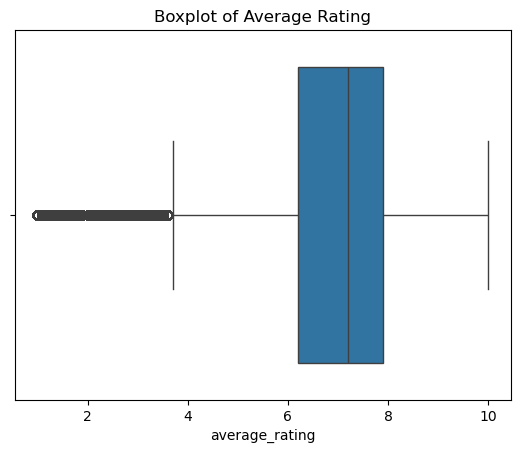

In [214]:
sns.boxplot(x=title_data['average_rating'])
plt.title('Boxplot of Average Rating')
plt.show()

There are no invalid entries in average_rating (0 or greater, 10 or lower).

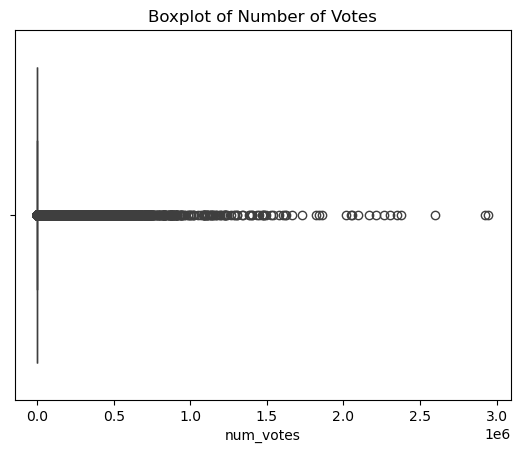

In [216]:
sns.boxplot(x=title_data['num_votes'])
plt.title('Boxplot of Number of Votes')
plt.show()

There are no invalid entries in num_votes (negative values).

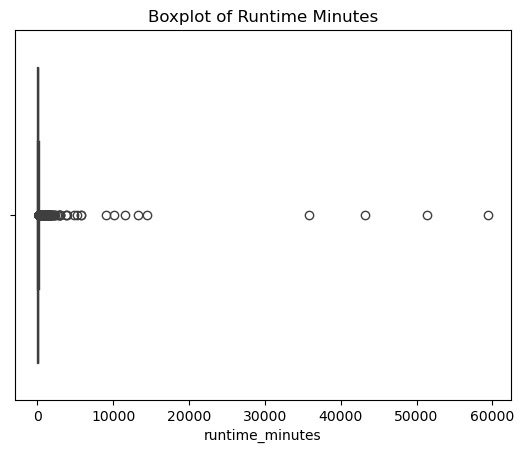

In [218]:
sns.boxplot(x=title_data['runtime_minutes'])
plt.title('Boxplot of Runtime Minutes')
plt.show()

There are five natural outliers in num_votes and four extreme outliers could indicate possible errors. After confirming these runtimes as accurate and not errors, I left them in the data.

In [220]:
runtime_outliers = title_data[title_data['runtime_minutes'] > 10000]
print(runtime_outliers)

             tconst  title_type                              primary_title  \
510806   tt10844900       Movie                                         Qw   
560333   tt11707418  TV Special                  Svalbard Minute by Minute   
581734   tt12095652       Video  The Longest Video on YouTube: 596.5 Hours   
995702    tt2659636       Movie                       Modern Times Forever   
1048925  tt29302558       Movie                                        100   
1065940  tt30325465       Video       La Media Inglesa: Directo Extensible   
1152092   tt3854496       Movie                                   Ambiancé   
1403803   tt8273150       Movie                                  Logistics   

                                    original_title  is_adult start_year  \
510806                                          Qw     False 2019-01-01   
560333                  Svalbard minutt for minutt     False 2020-01-01   
581734   The Longest Video on YouTube: 596.5 Hours     False 2011-01-01 

In [221]:
invalid_title_dates = title_data[(title_data['start_year'] < '1678-01-01') | 
                           (title_data['start_year'] > '2262-01-01') | 
                           (title_data['end_year'] < '1678-01-01') | 
                           (title_data['end_year'] > '2262-01-01')]
print(f'Invalid Dates Count: {invalid_title_dates.shape[0]}')

Invalid Dates Count: 0


In [222]:
invalid_name_dates = name_basics_clean[(name_basics_clean['birth_year'] < '1678-01-01') | 
                           (name_basics_clean['birth_year'] > '2262-01-01') | 
                           (name_basics_clean['death_year'] < '1678-01-01') | 
                           (name_basics_clean['death_year'] > '2262-01-01')]
print(f'Invalid Dates Count: {invalid_name_dates.shape[0]}')

Invalid Dates Count: 0


### 1.20 Dropped unneeded columns and refined formatting.

In [224]:
title_data = title_data[['tconst', 'title_type', 'primary_title', 'original_title', 'director_name', 'writer_name', 'start_year', 'end_year', 'runtime_minutes', 'genre_1', 'genre_2', 'genre_3','average_rating', 'num_votes', 'is_adult']]
# Dropped 'genres' and reordered df
title_data.head()

,tconst,title_type,primary_title,original_title,director_name,writer_name,start_year,end_year,runtime_minutes,genre_1,genre_2,genre_3,average_rating,num_votes,is_adult
0,tt0000001,Short,Carmencita,Carmencita,William K.L. Dickson,Unknown,1894-01-01,2262-01-01,1.0,Documentary,Short,None,5.7,2089,False
1,tt0000002,Short,Le clown et ses chiens,Le clown et ses chiens,Émile Reynaud,Unknown,1892-01-01,2262-01-01,5.0,Animation,Short,None,5.6,283,False
2,tt0000003,Short,Pauvre Pierrot,Pauvre Pierrot,Émile Reynaud,Unknown,1892-01-01,2262-01-01,5.0,Animation,Comedy,Romance,6.5,2096,False
3,tt0000004,Short,Un bon bock,Un bon bock,Émile Reynaud,Unknown,1892-01-01,2262-01-01,12.0,Animation,Short,None,5.4,183,False
4,tt0000005,Short,Blacksmith Scene,Blacksmith Scene,William K.L. Dickson,Unknown,1893-01-01,2262-01-01,1.0,Comedy,Short,None,6.2,2832,False


In [225]:
name_basics_clean = name_basics_clean[['nconst', 'primary_name', 'birth_year', 'death_year', 'known_for_titles', 'profession_1', 'profession_2', 'profession_3']]
# Dropped 'primary_profession' and reordered df
name_basics_clean.head()

,nconst,primary_name,birth_year,death_year,known_for_titles,profession_1,profession_2,profession_3
0,nm0000001,Fred Astaire,1899-01-01,1987-01-01,"The Towering Inferno, Funny Face, On the Beach...",Actor,Miscellaneous,Producer
1,nm0000002,Lauren Bacall,1924-01-01,2014-01-01,"To Have and Have Not, The Shootist, The Mirror...",Actress,Soundtrack,Archive Footage
2,nm0000003,Brigitte Bardot,1934-01-01,2262-01-01,"Contempt, ...And God Created Woman, Love on a ...",Actress,Music Department,Producer
3,nm0000004,John Belushi,1949-01-01,1982-01-01,"Saturday Night Live, National Lampoon's Animal...",Actor,Writer,Music Department
4,nm0000005,Ingmar Bergman,1918-01-01,2007-01-01,"Wild Strawberries, Fanny and Alexander, The Se...",Writer,Director,Actor


In [226]:
title_principals_clean.rename(columns={
    'primary_title': 'title_name',
    'primary_name': 'principal_name',
    'category': 'job_category',
}, inplace=True)

In [227]:
title_principals_clean = title_principals_clean[['tconst', 'title_name', 'nconst', 'principal_name', 'job_category', 'job', 'characters']]
# Dropped 'primary_profession' and reordered df
title_principals_clean.head()

,tconst,title_name,nconst,principal_name,job_category,job,characters
0,tt0000001,Carmencita,nm1588970,Carmencita,Self,Unknown,"[""Self""]"
1,tt0000001,Carmencita,nm0005690,William K.L. Dickson,Director,Unknown,Unknown
2,tt0000001,Carmencita,nm0005690,William K.L. Dickson,Producer,Producer,Unknown
3,tt0000001,Carmencita,nm0374658,William Heise,Cinematographer,Director Of Photography,Unknown
4,tt0000002,Le clown et ses chiens,nm0721526,Émile Reynaud,Director,Unknown,Unknown


### 1.21 Duplicated datasets for further manipulation and analysis.

In [229]:
title_names = title_data.copy() # Combined title_basics, title_crew, title_ratings, and name_basics data
akas = title_akas_clean.copy() 
episodes = title_episode_clean.copy() 
principals = title_principals_clean.copy()
name_data = name_basics_clean.copy()

### 1.22 Reviewed data structure and saved cleaned copies as CSV files.

In [231]:
print(title_names.info())
print(title_names.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468993 entries, 0 to 1468992
Data columns (total 15 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   tconst           1468993 non-null  object        
 1   title_type       1468993 non-null  object        
 2   primary_title    1468993 non-null  object        
 3   original_title   1468993 non-null  object        
 4   director_name    1468993 non-null  object        
 5   writer_name      1468993 non-null  object        
 6   start_year       1468993 non-null  datetime64[ns]
 7   end_year         1468993 non-null  datetime64[ns]
 8   runtime_minutes  1468993 non-null  float64       
 9   genre_1          1468993 non-null  object        
 10  genre_2          1468993 non-null  object        
 11  genre_3          1468993 non-null  object        
 12  average_rating   1468993 non-null  float64       
 13  num_votes        1468993 non-null  int64         
 14  is

In [232]:
print(akas.info())
print(akas.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 47171459 entries, 0 to 47171460
Data columns (total 7 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   title_id           object
 1   title              object
 2   region             object
 3   language           object
 4   attributes         object
 5   is_original_title  bool  
 6   types              object
dtypes: bool(1), object(6)
memory usage: 2.5+ GB
None
         title_id          title    region  language attributes  \
count    47171459       47171459  47171459  47171459   47171459   
unique   10504625        6843683       248       109        185   
top     tt0088814  Episodio #1.1   Unknown   Unknown    Unknown   
freq          251          98171  10583136  15672598   46891370   

       is_original_title     types  
count           47171459  47171459  
unique                 2        24  
top                False   Unknown  
freq            36666841  32596283  


In [233]:
print(episodes.info())
print(episodes.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8538187 entries, 0 to 8538186
Data columns (total 4 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   parent_tconst   object
 2   season_number   int64 
 3   episode_number  int64 
dtypes: int64(2), object(2)
memory usage: 260.6+ MB
None
       season_number  episode_number
count   8.538187e+06    8.538187e+06
mean    3.030700e+00    3.394592e+02
std     2.219434e+01    1.210049e+03
min     0.000000e+00    0.000000e+00
25%     1.000000e+00    2.000000e+00
50%     1.000000e+00    1.300000e+01
75%     2.000000e+00    1.020000e+02
max     2.024000e+03    9.133400e+04


In [234]:
print(principals.info())
print(principals.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 86007873 entries, 0 to 86305807
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   title_name      object
 2   nconst          object
 3   principal_name  object
 4   job_category    object
 5   job             object
 6   characters      object
dtypes: object(7)
memory usage: 5.1+ GB
None
           tconst    title_name     nconst principal_name job_category  \
count    86007873      85997301   86007873       86006584     86007873   
unique    9849750       4402836    6345681        5276515           13   
top     tt5734258  Episode #1.1  nm0438471    Ekta Kapoor        Actor   
freq           57        461936      32747          32747     20469389   

             job characters  
count   86007873   86007873  
unique     41970    4097102  
top      Unknown    Unknown  
freq    69763723   44371051  


In [235]:
print(name_data.info())
print(name_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13846512 entries, 0 to 13846511
Data columns (total 8 columns):
 #   Column            Dtype         
---  ------            -----         
 0   nconst            object        
 1   primary_name      object        
 2   birth_year        datetime64[ns]
 3   death_year        datetime64[ns]
 4   known_for_titles  object        
 5   profession_1      object        
 6   profession_2      object        
 7   profession_3      object        
dtypes: datetime64[ns](2), object(6)
memory usage: 845.1+ MB
None
                          birth_year                     death_year
count                       13846512                       13846512
mean   1690-06-28 22:27:38.049908736  2257-06-19 12:21:53.716894720
min              1678-01-01 00:00:00            1679-01-01 00:00:00
25%              1678-01-01 00:00:00            2262-01-01 00:00:00
50%              1678-01-01 00:00:00            2262-01-01 00:00:00
75%              1678-01-01 00:0

In [236]:
title_names.to_csv('title_names.csv', index=False)
akas.to_csv('akas.csv', index=False)
episodes.to_csv('episodes.csv', index=False)
principals.to_csv('principals.csv', index=False)
name_data.to_csv('name_data.csv', index=False)

## 2. Exploratory Analysis of IMDb Data Sets

### 2.1 Reviewed data set rows.

My exploratory analyis focuses on titles, genres, and principals (cast and crew), so I am primarily using dfs title_names, name_data, and principals.

In [265]:
print(title_names.shape)
title_names.head()

(1468993, 15)


,tconst,title_type,primary_title,original_title,director_name,writer_name,start_year,end_year,runtime_minutes,genre_1,genre_2,genre_3,average_rating,num_votes,is_adult
0,tt0000001,Short,Carmencita,Carmencita,William K.L. Dickson,Unknown,1894-01-01,2262-01-01,1.0,Documentary,Short,None,5.7,2089,False
1,tt0000002,Short,Le clown et ses chiens,Le clown et ses chiens,Émile Reynaud,Unknown,1892-01-01,2262-01-01,5.0,Animation,Short,None,5.6,283,False
2,tt0000003,Short,Pauvre Pierrot,Pauvre Pierrot,Émile Reynaud,Unknown,1892-01-01,2262-01-01,5.0,Animation,Comedy,Romance,6.5,2096,False
3,tt0000004,Short,Un bon bock,Un bon bock,Émile Reynaud,Unknown,1892-01-01,2262-01-01,12.0,Animation,Short,None,5.4,183,False
4,tt0000005,Short,Blacksmith Scene,Blacksmith Scene,William K.L. Dickson,Unknown,1893-01-01,2262-01-01,1.0,Comedy,Short,None,6.2,2832,False


In [266]:
print(principals.shape)
principals.head()

(86007873, 7)


,tconst,title_name,nconst,principal_name,job_category,job,characters
0,tt0000001,Carmencita,nm1588970,Carmencita,Self,Unknown,"[""Self""]"
1,tt0000001,Carmencita,nm0005690,William K.L. Dickson,Director,Unknown,Unknown
2,tt0000001,Carmencita,nm0005690,William K.L. Dickson,Producer,Producer,Unknown
3,tt0000001,Carmencita,nm0374658,William Heise,Cinematographer,Director Of Photography,Unknown
4,tt0000002,Le clown et ses chiens,nm0721526,Émile Reynaud,Director,Unknown,Unknown


In [267]:
print(name_data.shape)
name_data.head()

(13846512, 8)


,nconst,primary_name,birth_year,death_year,known_for_titles,profession_1,profession_2,profession_3
0,nm0000001,Fred Astaire,1899-01-01,1987-01-01,"The Towering Inferno, Funny Face, On the Beach...",Actor,Miscellaneous,Producer
1,nm0000002,Lauren Bacall,1924-01-01,2014-01-01,"To Have and Have Not, The Shootist, The Mirror...",Actress,Soundtrack,Archive Footage
2,nm0000003,Brigitte Bardot,1934-01-01,2262-01-01,"Contempt, ...And God Created Woman, Love on a ...",Actress,Music Department,Producer
3,nm0000004,John Belushi,1949-01-01,1982-01-01,"Saturday Night Live, National Lampoon's Animal...",Actor,Writer,Music Department
4,nm0000005,Ingmar Bergman,1918-01-01,2007-01-01,"Wild Strawberries, Fanny and Alexander, The Se...",Writer,Director,Actor


### 2.2 Identified top-rated directors.

I began by running statistics on director title counts, then calculated the average rating for each director (based on all their films). These directors may be good investments for future projects due to previous highly-rated projects.

In [270]:
titles_per_director = title_names['director_name'].value_counts() # Counted the number of titles per director
print("Descriptive Statistics for Number of Titles per Director:")
print(titles_per_director.describe())

Descriptive Statistics for Number of Titles per Director:
count    205088.000000
mean          7.162745
std         945.561383
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max      428136.000000
Name: count, dtype: float64


In [271]:
titles_principals = title_names.merge(principals[['tconst', 'principal_name', 'job_category']], 
                               how='left', 
                               on='tconst')

In [272]:
directors_data = titles_principals[titles_principals['job_category'] == 'Director']  
director_ratings = directors_data.groupby('principal_name')['average_rating'].mean().reset_index()
top_directors = director_ratings.sort_values(by='average_rating', ascending=False) # Displayed highest rated directors first
print(top_directors.head(10))

          principal_name  average_rating
104267          Jin Pang            10.0
69535    Fidel Arizmendi            10.0
64695        Eric Espino            10.0
1960           Adam Kiss            10.0
146459   Matison LeBlanc            10.0
15633         Ankit Gola            10.0
166920       Nuclear Xav            10.0
165070  Nikhil Shirbhate            10.0
180761      Rahul Dhiman            10.0
107479      John Haycock            10.0


In [273]:
director_votes = directors_data.groupby('principal_name').apply( # Calculated weighted average
    lambda x: (x['average_rating'] * x['num_votes']).sum() / x['num_votes'].sum()
).reset_index(name='weighted_avg_rating')
top_director_votes = director_votes.sort_values(by='weighted_avg_rating', ascending=False)
print(top_director_votes.head(25))

                      principal_name  weighted_avg_rating
218069                  Thomas Reyna                 10.0
145301               Maryam Yadegari                 10.0
62451               Elizabeth Tobias                 10.0
95377                 James Peverill                 10.0
220970               Tom Neunzerling                 10.0
162274                    Ned Harris                 10.0
162198                    Neal Gavyn                 10.0
89821                     Inpyo Hong                 10.0
162152                  Nazila Azizi                 10.0
119168            Kary Hyunjeong Rho                 10.0
145849         Mashrukur Rahman Khan                 10.0
162752              Nenad Teofilovic                 10.0
195910                Sam Swainsbury                 10.0
162074                         Navin                 10.0
145928  Massimiliano Oliva Bartolozz                 10.0
201785               Shachar Cherkez                 10.0
162059        

### 2.3 Identified top-rated actors.

As with directors, I ran statistics on actor title counts, then calculated the average rating. These actors may also be good investments for future projects.

In [276]:
actor_titles = principals[principals['job_category'].isin(['Actor', 'Actress'])]
actor_counts = actor_titles['principal_name'].value_counts()
print("Descriptive Statistics for Number of Titles per Actor:")
print(actor_counts.describe())
print(actor_counts)

Descriptive Statistics for Number of Titles per Actor:
count    2.935684e+06
mean     1.218927e+01
std      8.424910e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      1.097300e+04
Name: count, dtype: float64
principal_name
Kenjirô Ishimaru     10973
Sameera Sherief      10436
Vic Sotto            10404
Tito Sotto            9758
Joel de Leon          9707
                     ...  
Sarah Widman             1
Leon Pulvermacher        1
Jean Malaquais           1
Paige Knutson            1
Adrian Iselin            1
Name: count, Length: 2935684, dtype: int64


In [277]:
actors_data = titles_principals[(titles_principals['job_category'] == 'Actor') | 
                                (titles_principals['job_category'] == 'Actress')]
actor_ratings = actors_data.groupby('principal_name')['average_rating'].mean().reset_index()
top_actors = actor_ratings.sort_values(by='average_rating', ascending=False)
print(top_actors.head(10))

             principal_name  average_rating
1239306         Taryd Makal            10.0
653950        Julia Eisfeld            10.0
1088893      Robert Larcara            10.0
43057    Alexandra Kulikova            10.0
362278        Elijah Blowes            10.0
779495         Louis Lavoie            10.0
588069       Jennifer López            10.0
724130       Krutika Jadhav            10.0
1040805         Puji Sofian            10.0
844071      Marlo di Angelo            10.0


In [278]:
actor_votes = actors_data.groupby('principal_name').apply(
    lambda x: (x['average_rating'] * x['num_votes']).sum() / x['num_votes'].sum()
).reset_index(name='weighted_avg_rating')
top_actor_votes = actor_votes.sort_values(by='weighted_avg_rating', ascending=False)
print(top_actor_votes.head(10))

                   principal_name  weighted_avg_rating
828363           Mariane Filomeno                 10.0
191146               Busboy Bobby                 10.0
246706        Christopher M. King                 10.0
762096               Liliana Adam                 10.0
304686        David Santo Vásquez                 10.0
84232               Angela Barrow                 10.0
1184528     Simon Valeur Lundberg                 10.0
474677       Gustavo Daniel Bueno                 10.0
317868              Derek M. Puma                 10.0
983170   Olha Mykhaylivna Chendej                 10.0


### 2.4 Examined genre distribution.

In [280]:
all_genres = pd.concat([title_names['genre_1'], title_names['genre_2'], title_names['genre_3']])
unique_genres = all_genres.nunique()
print(f"There are {unique_genres} unique genres.")

There are 30 unique genres.


Excluding the variables representing null genres (None and Unknown), there are 28 genres.

In [282]:
all_genres = pd.Series(all_genres) # Converted to series
title_genres = all_genres[~all_genres.isin(['None', 'Unknown'])]

In [283]:
genre_counts = title_genres.value_counts()
print(genre_counts)

Drama          501074
Comedy         455748
Documentary    188346
Action         184766
Animation      174823
Short          170242
Adventure      164028
Crime          158300
Romance        116023
Family         106238
Reality-TV      80045
Mystery         70324
Thriller        61940
Horror          61581
Fantasy         60850
Music           47059
History         44659
Talk-Show       42354
Game-Show       37028
Sci-Fi          36801
Biography       30703
Sport           29239
Adult           22353
News            20438
Western         16928
War             15792
Musical         13737
Film-Noir         873
Name: count, dtype: int64


<Axes: title={'center': 'IMDb Title Counts per Genre'}>

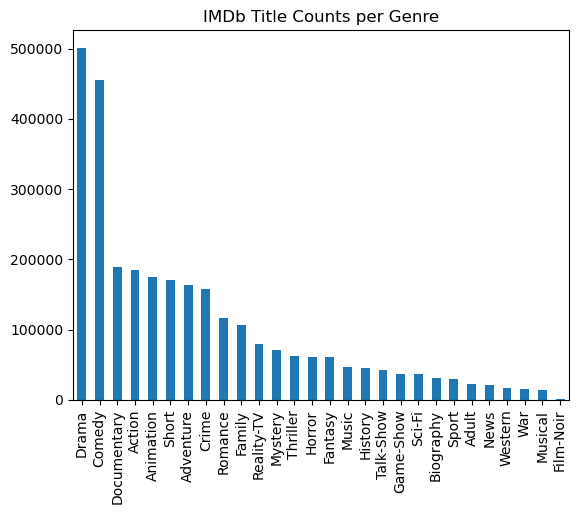

In [284]:
genre_counts.plot(kind='bar', title='IMDb Title Counts per Genre')

Drama and Comedy are the leading genres by far, followed by Documentary, Action, and Animation.

## 3. Genre and Average Rating Analysis

After completing my exploratory analysis of the datasets, I decided to focus on genre and examine it's relationship to average ratings.

### 3.1 Calculated average ratings per genre and created bar charts.

In [290]:
genre_ratings = title_names.melt(id_vars='average_rating', # Melted genres into one column
                                        value_vars=['genre_1', 'genre_2', 'genre_3'], 
                                        var_name='genre_column', 
                                        value_name='genre')
genre_ratings = genre_ratings[~genre_ratings['genre'].isin(['None', 'Unknown'])] # Filtered null genres
avg_genre_ratings = genre_ratings.groupby('genre')['average_rating'].mean().sort_values(ascending=False) 
print(avg_genre_ratings)

genre
History        7.362581
Documentary    7.249891
Biography      7.223802
Animation      7.143446
Adventure      7.128809
Crime          7.122136
Sport          7.098622
Mystery        7.094264
Music          7.089141
Family         7.088637
Fantasy        7.078669
Game-Show      7.077903
Drama          7.057982
War            7.055313
Reality-TV     7.046766
Action         7.038350
Western        7.004401
Comedy         6.989156
Romance        6.932597
Short          6.846570
News           6.807794
Talk-Show      6.787805
Sci-Fi         6.674052
Musical        6.630305
Film-Noir      6.459107
Thriller       6.443539
Adult          6.259916
Horror         6.106970
Name: average_rating, dtype: float64


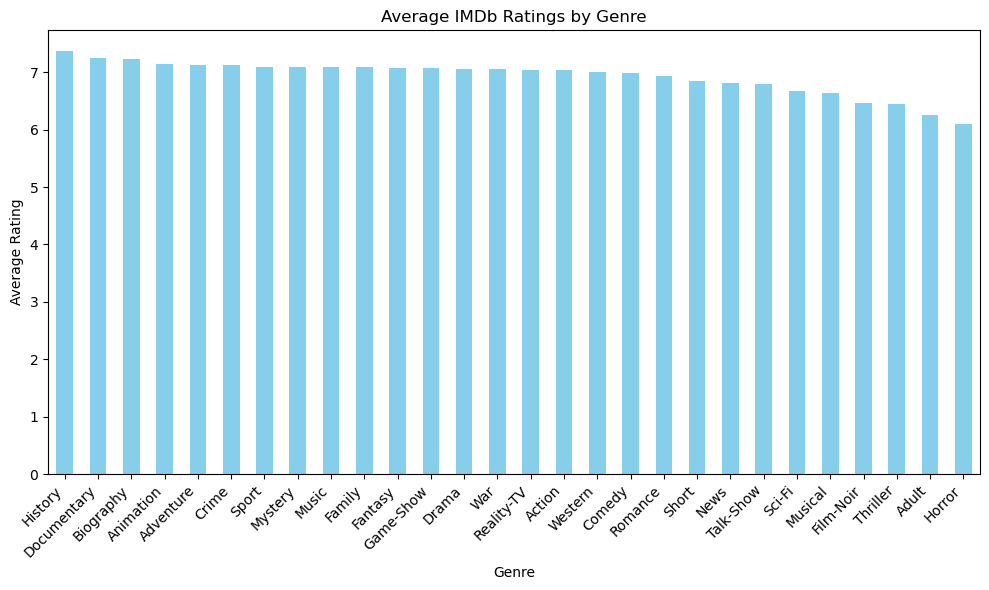

In [292]:
plt.figure(figsize=(10, 6))
avg_genre_ratings.plot(kind='bar', color='skyblue')
plt.title('Average IMDb Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 3.2 Generated statistics for genres.

In [302]:
genre_melt = title_names.melt(value_vars=['genre_1', 'genre_2', 'genre_3'],  # Melted genres alone for statistics
                              var_name='genre_column', 
                              value_name='genre')

In [304]:
genre_melt = genre_melt[~genre_melt['genre'].isin(['None', 'Unknown'])]
titles_per_genre = genre_melt['genre'].value_counts()
print("Descriptive Statistics for Number of Titles per Genre:")
print(titles_per_genre.describe())

Descriptive Statistics for Number of Titles per Genre:
count        28.000000
mean     104010.428571
std      121197.032403
min         873.000000
25%       30337.000000
50%       61215.500000
75%      159732.000000
max      501074.000000
Name: count, dtype: float64


I also combined the average ratings and title counts for genres.

In [306]:
genre_stats = genre_ratings.groupby('genre').agg(
    average_rating=('average_rating', 'mean'),
    title_count=('average_rating', 'count')
).reset_index()
genre_stats.sort_values(by='average_rating', ascending=False, inplace=True)

In [307]:
print(genre_stats)

          genre  average_rating  title_count
13      History        7.362581        44659
7   Documentary        7.249891       188346
4     Biography        7.223802        30703
3     Animation        7.143446       174823
2     Adventure        7.128809       164028
6         Crime        7.122136       158300
23        Sport        7.098622        29239
17      Mystery        7.094264        70324
15        Music        7.089141        47059
9        Family        7.088637       106238
10      Fantasy        7.078669        60850
12    Game-Show        7.077903        37028
8         Drama        7.057982       501074
26          War        7.055313        15792
19   Reality-TV        7.046766        80045
0        Action        7.038350       184766
27      Western        7.004401        16928
5        Comedy        6.989156       455748
20      Romance        6.932597       116023
22        Short        6.846570       170242
18         News        6.807794        20438
24    Talk

### 3.3 Created horizontal bar charts for average ratings.

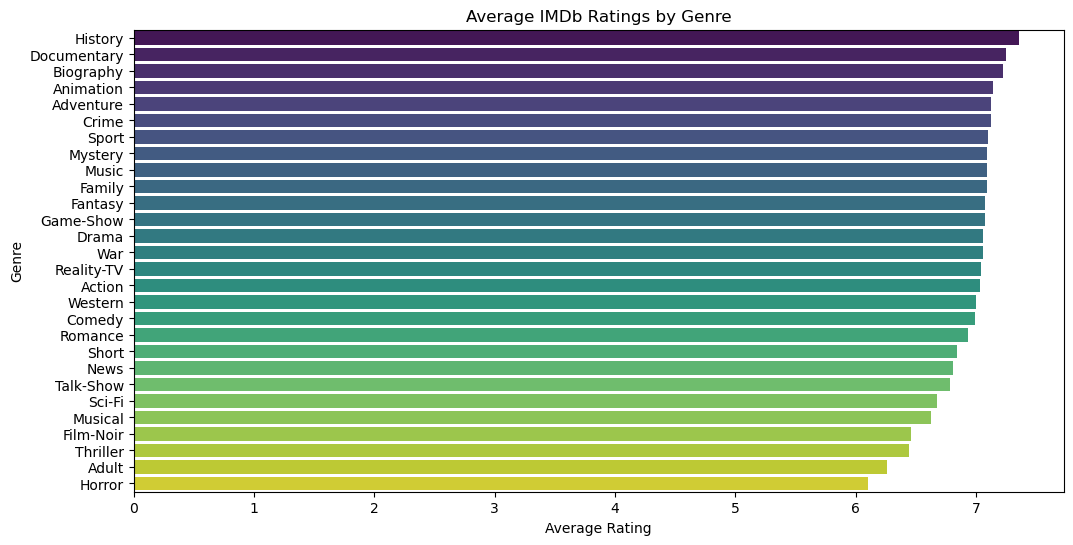

In [312]:
# Bar Chart for Average Ratings per Genre
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_stats, x='average_rating', y='genre', palette='viridis')
plt.title('Average IMDb Ratings by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

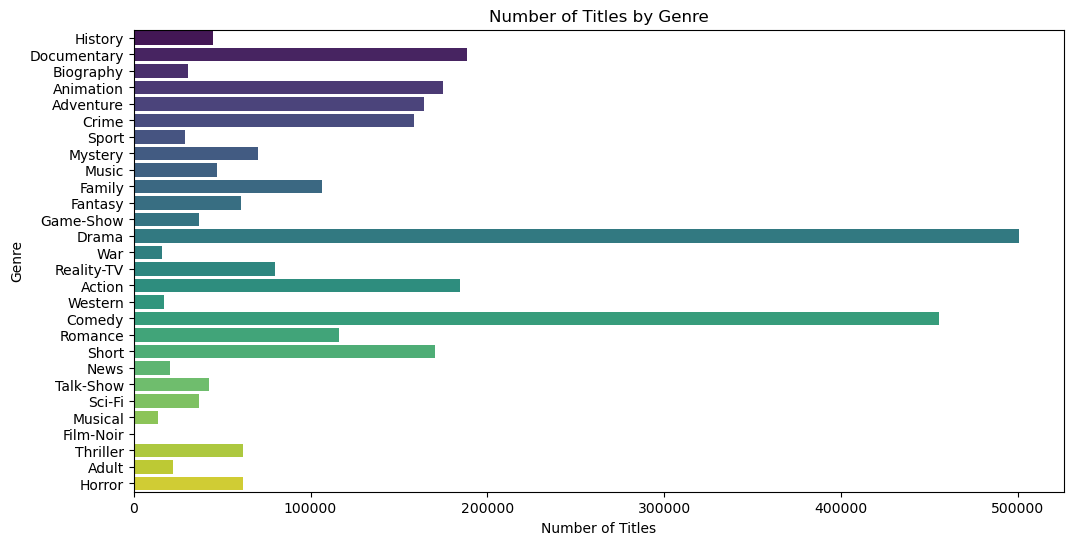

In [313]:
# Bar Chart for Title Counts per Genre
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_stats, x='title_count', y='genre', palette='viridis')
plt.title('Number of Titles by Genre')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

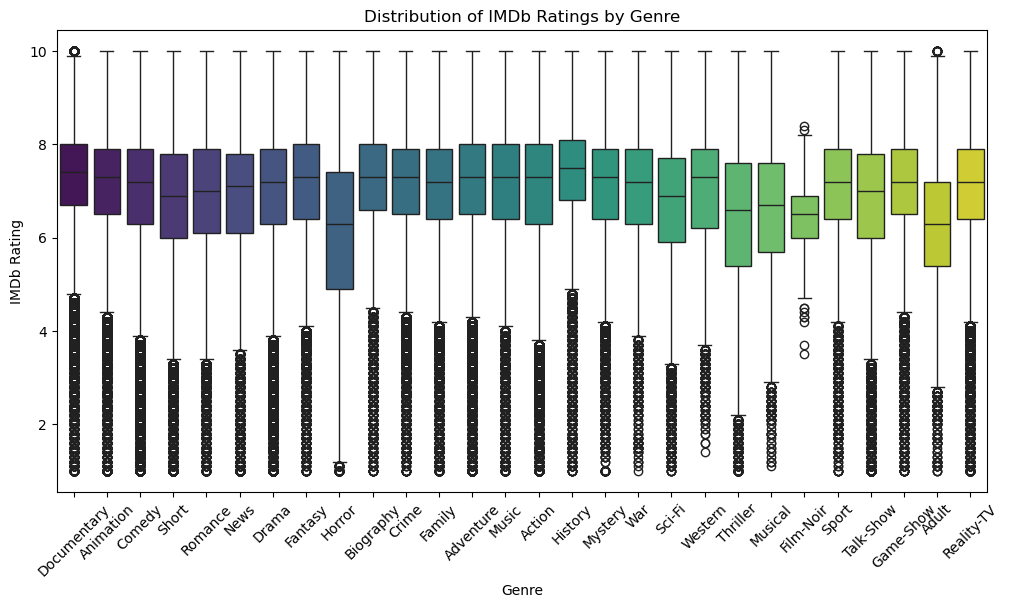

In [321]:
# Box Plot for Average IMDb Ratings by Genre
plt.figure(figsize=(12, 6))
sns.boxplot(data=genre_ratings, x='genre', y='average_rating', palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribution of IMDb Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('IMDb Rating')
plt.show()

### 3.4 Created a scatter plot for the genre/rating relationship.

This plots the number of titles versus the average rating for each genre.

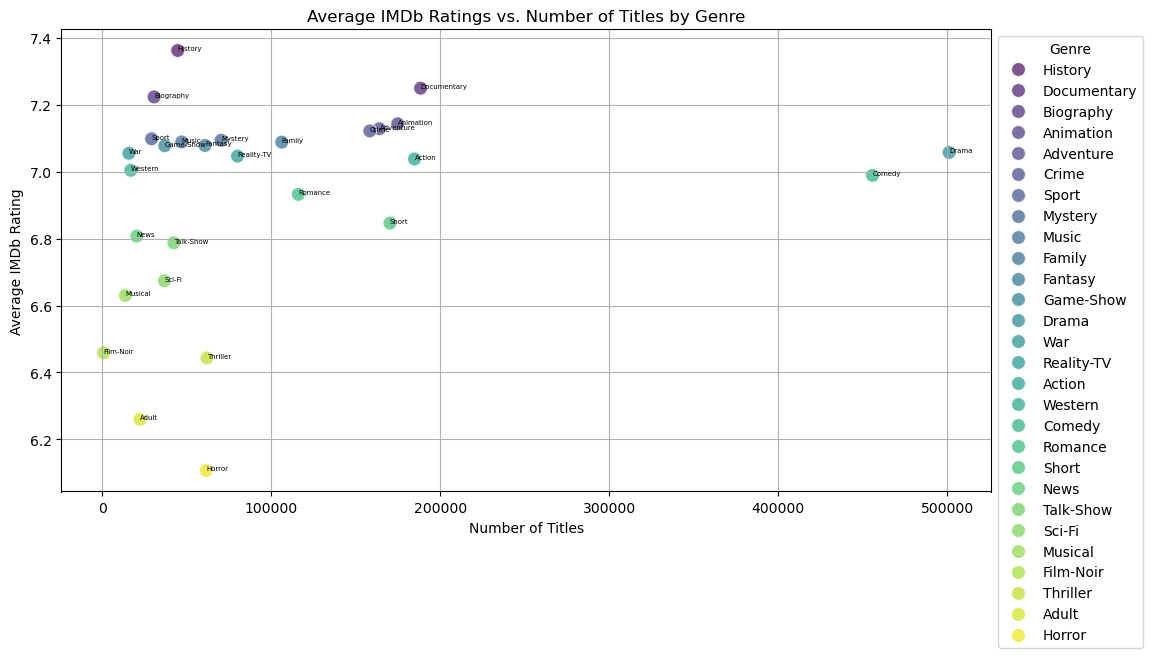

In [323]:
plt.figure(figsize=(12, 6))
scatter_plot = sns.scatterplot(data=genre_stats, x='title_count', y='average_rating', hue='genre', palette='viridis', s=100, alpha=0.7)
for line in range(0, genre_stats.shape[0]):
    scatter_plot.text(
        genre_stats.title_count.iloc[line],
        genre_stats.average_rating.iloc[line],
        genre_stats.genre.iloc[line],
        horizontalalignment='left',
        size='5',
        color='black',
        weight='normal'
    )
plt.title('Average IMDb Ratings vs. Number of Titles by Genre')
plt.xlabel('Number of Titles')
plt.ylabel('Average IMDb Rating')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Genre')
plt.grid(True)
plt.show()

### 3.5 Examined average ratings for multiple genre combinations.

In [325]:
genre_dummies = pd.get_dummies(title_names[['genre_1', 'genre_2', 'genre_3']], prefix='', prefix_sep='') # Created dummies for genres (binary: FALSE if title isn't genre, TRUE if title is genre)
df_genres = pd.concat([title_names['average_rating'], genre_dummies], axis=1) # Combined with average rating
def get_genre_combination(row): # Created function to return combination as string
    genres = genre_dummies.columns[row == True].tolist()
    return ', '.join(genres) if genres else 'None'
df_genres['genre_combination'] = genre_dummies.apply(get_genre_combination, axis=1) # Apply to each row
average_rating_by_genre_combination = df_genres.groupby('genre_combination')['average_rating'].mean().reset_index()
average_rating_by_genre_combination.sort_values(by='average_rating', ascending=False, inplace=True)
print(average_rating_by_genre_combination)

                     genre_combination  average_rating
1369  Documentary, Musical, Reality-TV        9.500000
746     Animation, Musical, Reality-TV        9.400000
1859        Horror, Mystery, Talk-Show        9.300000
2011      Reality-TV, Short, Talk-Show        9.254762
1931                  Music, War, None        9.250000
...                                ...             ...
2043             Sci-Fi, Thriller, War        3.200000
1999                  News, Short, War        2.700000
1135                Comedy, Sport, War        2.500000
909       Biography, Reality-TV, Sport        2.300000
1427          Drama, Family, Game-Show        1.700000

[2070 rows x 2 columns]


In [326]:
average_rating_by_genre_combination.head(25)

,genre_combination,average_rating
1369,"Documentary, Musical, Reality-TV",9.500000
746,"Animation, Musical, Reality-TV",9.400000
1859,"Horror, Mystery, Talk-Show",9.300000
2011,"Reality-TV, Short, Talk-Show",9.254762
1931,"Music, War, None",9.250000
1025,"Comedy, Game-Show, Musical",9.218182
810,"Biography, Crime, Reality-TV",9.200000
1157,"Crime, Documentary, Talk-Show",9.200000
1795,"History, Music, News",9.200000
1608,"Family, History, Talk-Show",9.200000


### 3.6 Identified top titles per genre.

In [328]:
title_names_melted = pd.melt(title_names, 
                             id_vars=['primary_title', 'average_rating'],
                             value_vars=['genre_1', 'genre_2', 'genre_3'], 
                             var_name='genre_column', 
                             value_name='genre')
title_names_melted = title_names_melted[title_names_melted['genre'].notnull()]
title_names_melted = title_names_melted[title_names_melted['genre'] != 'Unknown']
top_titles_by_genre = title_names_melted.loc[title_names_melted.groupby('genre')['average_rating'].idxmax()]
top_titles_by_genre = top_titles_by_genre[['primary_title', 'average_rating', 'genre']].sort_values(by='average_rating', ascending=False)
print(top_titles_by_genre)

                                             primary_title  average_rating  \
511876   I challenge the Ender Dragon in Minecraft (End...            10.0   
198567   The Unbroken Circle: A Tribute to Mother Maybe...            10.0   
2624932                                  The Ghost Soldier            10.0   
630744                                 The Lady Masquerade            10.0   
589815                             Sinbad: Feed the Hungry            10.0   
610489               Los Angeles Raiders vs. Detroit Lions            10.0   
172778                                 Closed for Business            10.0   
1070936                                          BMW Ahead            10.0   
407865                                              Grapes            10.0   
527808   How to Spot a Crowdfunding Scam: Ed the Sock &...            10.0   
1546602                                      All I Know Is            10.0   
465819                 The Truth About 'Russian Collusion'      

## 4. Genre Trends

### 4.1 Plotted average rating for all films.

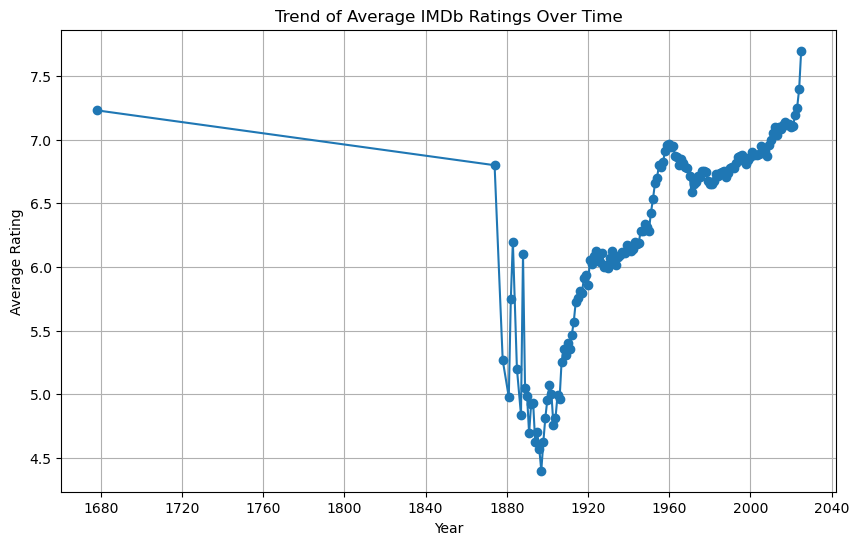

In [331]:
title_names_filtered = title_names[(title_names['start_year'] != 1678)] # Filter out 'unknown' stand in date
temporal_trend = title_names_filtered.groupby('start_year')['average_rating'].mean().reset_index()
plt.figure(figsize=(10,6))
plt.plot(temporal_trend['start_year'], temporal_trend['average_rating'], marker='o')
plt.title('Trend of Average IMDb Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

### 4.2 Plotted average rating by genre.

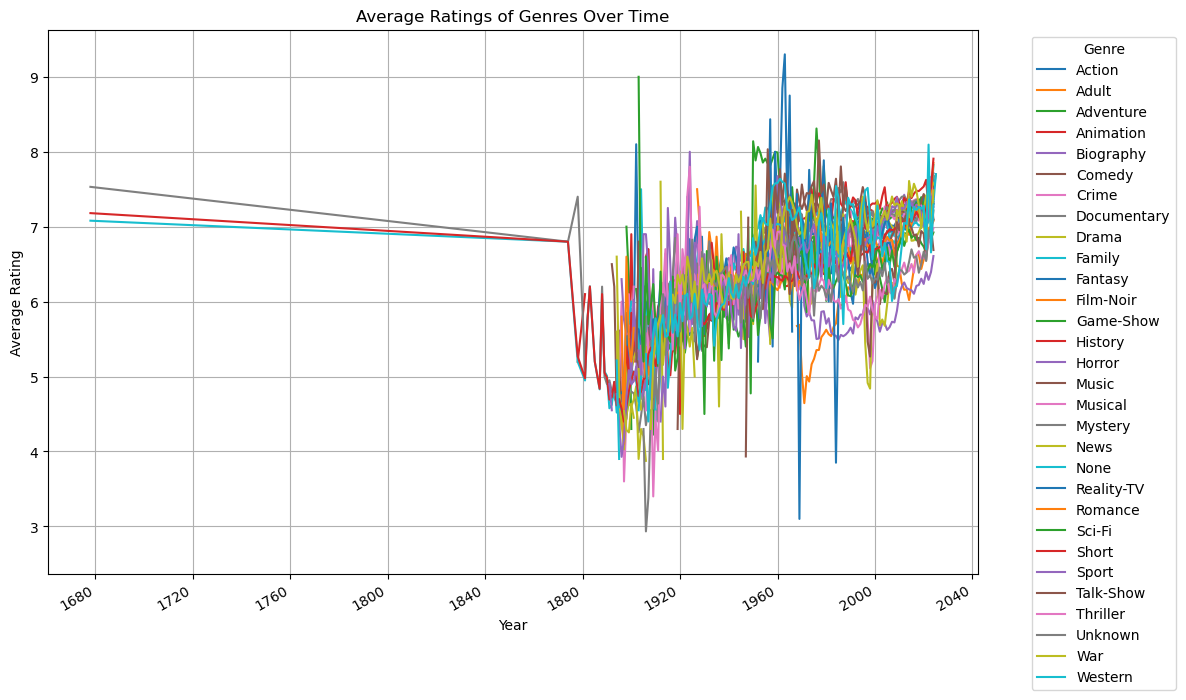

In [382]:
title_names_melted = pd.melt(title_names, 
                             id_vars=['primary_title', 'start_year', 'average_rating'],
                             value_vars=['genre_1', 'genre_2', 'genre_3'], 
                             var_name='genre_column', 
                             value_name='genre')
genre_evolution = title_names_melted.groupby(['start_year', 'genre'])['average_rating'].mean().reset_index()
genre_pivot = genre_evolution.pivot(index='start_year', columns='genre', values='average_rating') # Pivoted for easier plotting
genre_pivot.plot(figsize=(12, 8))
plt.title('Average Ratings of Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

While these line charts show the full span of dates in the dataset, they are hard to read. I will shorten the interval and replot.

These line charts reveal that most of the films in the data set before 1880 don't have a genre listed or it's simply identified as a short. This is where I will begin the interval for the next plots.

In [386]:
title_names_melted = title_names_melted[~(title_names_melted[['genre']].isin(['Unknown', 'None']).any(axis=1))] # Removed missing genre categories

In [387]:
title_names_melted['start_year'] = pd.to_datetime(title_names_melted['start_year'], errors='coerce').dt.year

In [388]:
print(title_names_melted.head())

            primary_title  start_year  average_rating genre_column  \
0              Carmencita        1894             5.7      genre_1   
1  Le clown et ses chiens        1892             5.6      genre_1   
2          Pauvre Pierrot        1892             6.5      genre_1   
3             Un bon bock        1892             5.4      genre_1   
4        Blacksmith Scene        1893             6.2      genre_1   

         genre  
0  Documentary  
1    Animation  
2    Animation  
3    Animation  
4       Comedy  


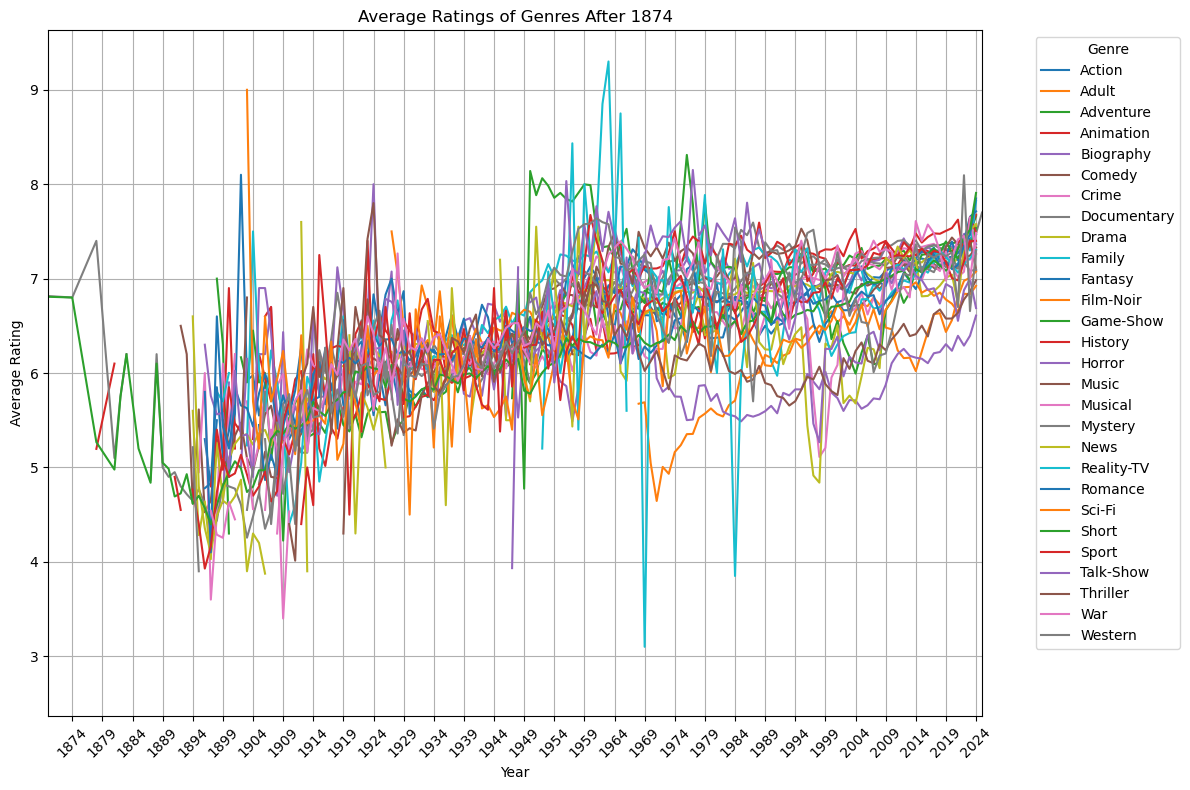

In [419]:
genre_evolution_rating = title_names_melted.groupby(['start_year', 'genre'])['average_rating'].mean().reset_index()
genre_pivot_rating = genre_evolution_rating.pivot(index='start_year', columns='genre', values='average_rating') # Pivoted for easier plotting
genre_pivot_rating.plot(figsize=(12, 8))
plt.title('Average Ratings of Genres After 1874')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=range(1874, title_names_melted['start_year'].max() + 1, 5), rotation=45) # Adjusted interval
plt.xlim(left=1870, right=2025)
plt.tight_layout()
plt.grid()
plt.show()

Since the chart is still crowded with so many genres, I will isolate the 10 genres with the highest ratings.

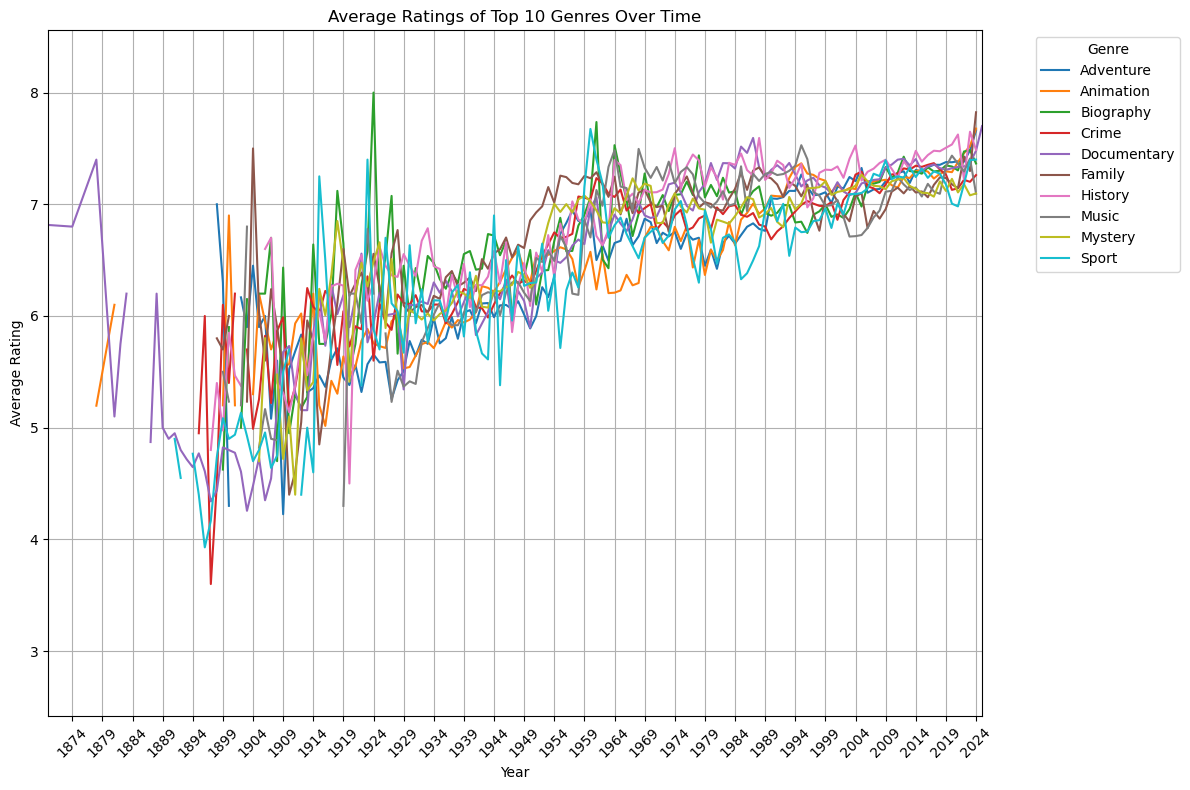

In [420]:
genre_avg_rating = title_names_melted.groupby('genre')['average_rating'].mean().reset_index()
top_10_genres = genre_avg_rating.nlargest(10, 'average_rating')['genre']
title_names_melted_top = title_names_melted[title_names_melted['genre'].isin(top_10_genres)]
genre_evolution_top = title_names_melted_top.groupby(['start_year', 'genre'])['average_rating'].mean().reset_index()
genre_pivot_top = genre_evolution_top.pivot(index='start_year', columns='genre', values='average_rating')
genre_pivot_top.plot(figsize=(12, 8))
plt.title('Average Ratings of Top 10 Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=range(1874, title_names_melted['start_year'].max() + 1, 5), rotation=45) # Adjusted interval
plt.xlim(left=1870, right=2025)
plt.tight_layout()
plt.grid()
plt.show()

To get an even closer look into recent genre trends, I will look at average ratings from 2000 on.

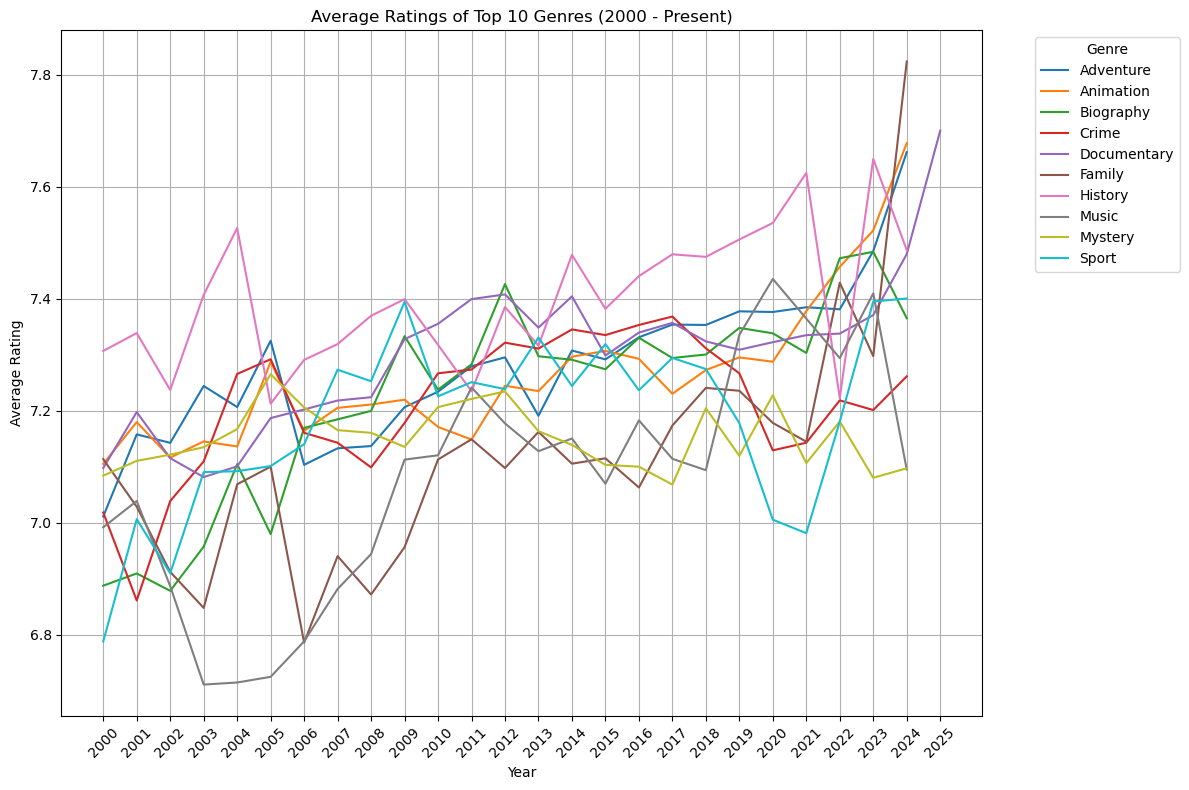

In [413]:
recent_top_genres = title_names_melted_top[title_names_melted_top['start_year'] >= 2000]
genre_evolution_recent = recent_top_genres.groupby(['start_year', 'genre'])['average_rating'].mean().reset_index()
genre_pivot_recent = genre_evolution_recent.pivot(index='start_year', columns='genre', values='average_rating')
genre_pivot_recent.plot(figsize=(12, 8))
plt.title('Average Ratings of Top 10 Genres (2000 - Present)')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=range(2000, title_names_melted_top['start_year'].max() + 1, 1), rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

This line chart gives me a clear view of recent trends in popular genres. Documentary, Adventure, and Animation have seen increases in average ratings in recent years. Family films saw a drastic increase in average ratings from 2023-2024.

### 4.3 Plotted genre count trends.

In [432]:
# title_names_melted['start_year'] = pd.to_datetime(title_names_melted['start_year'], errors='coerce', format='%Y') # Reconverted back to datetime
# title_names_melted['start_year'] = title_names_melted['start_year'].dt.year # Converted to year alone for filtering
title_names_melted = title_names_melted[(title_names_melted['start_year'] != 1678)]

<Figure size 1600x1000 with 0 Axes>

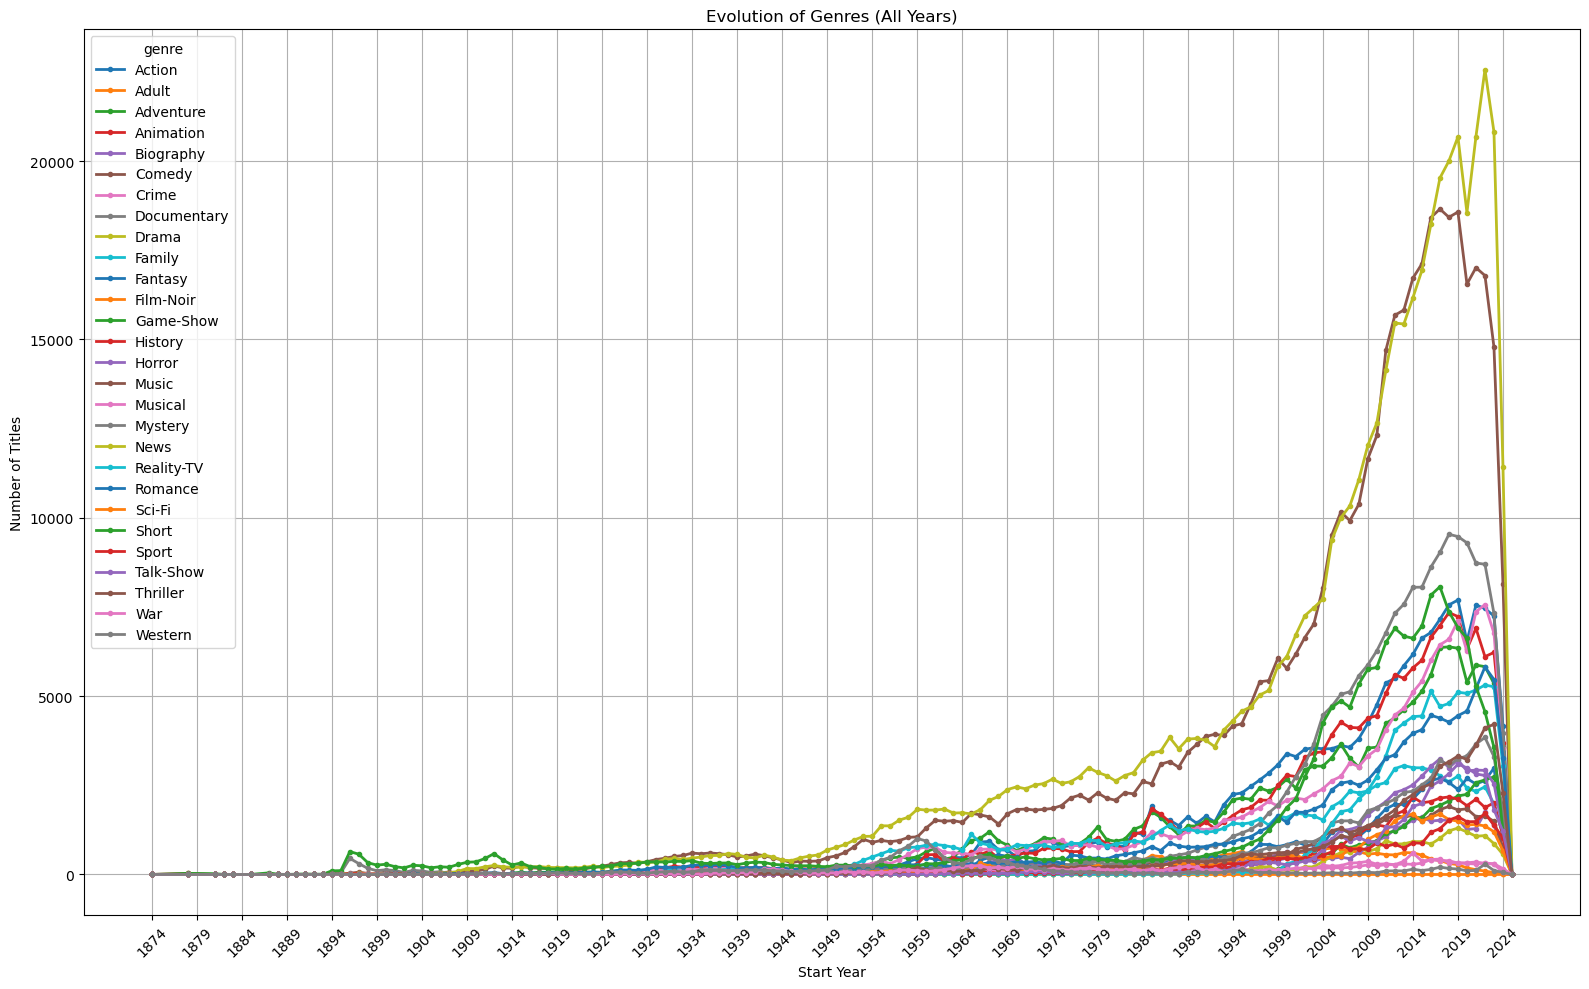

In [433]:
plt.figure(figsize=(16, 10)) # Increased size
genre_evolution_full = title_names_melted.groupby(['start_year', 'genre']).size().unstack(fill_value=0)
genre_evolution_full.plot(kind='line', lw=2, figsize=(16, 10), marker='o', markersize=3)
plt.title('Evolution of Genres (All Years)')
plt.xlabel('Start Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.xticks(ticks=range(title_names_melted['start_year'].min(), title_names_melted['start_year'].max()+1, 5), rotation=45) # Adjusted interval
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

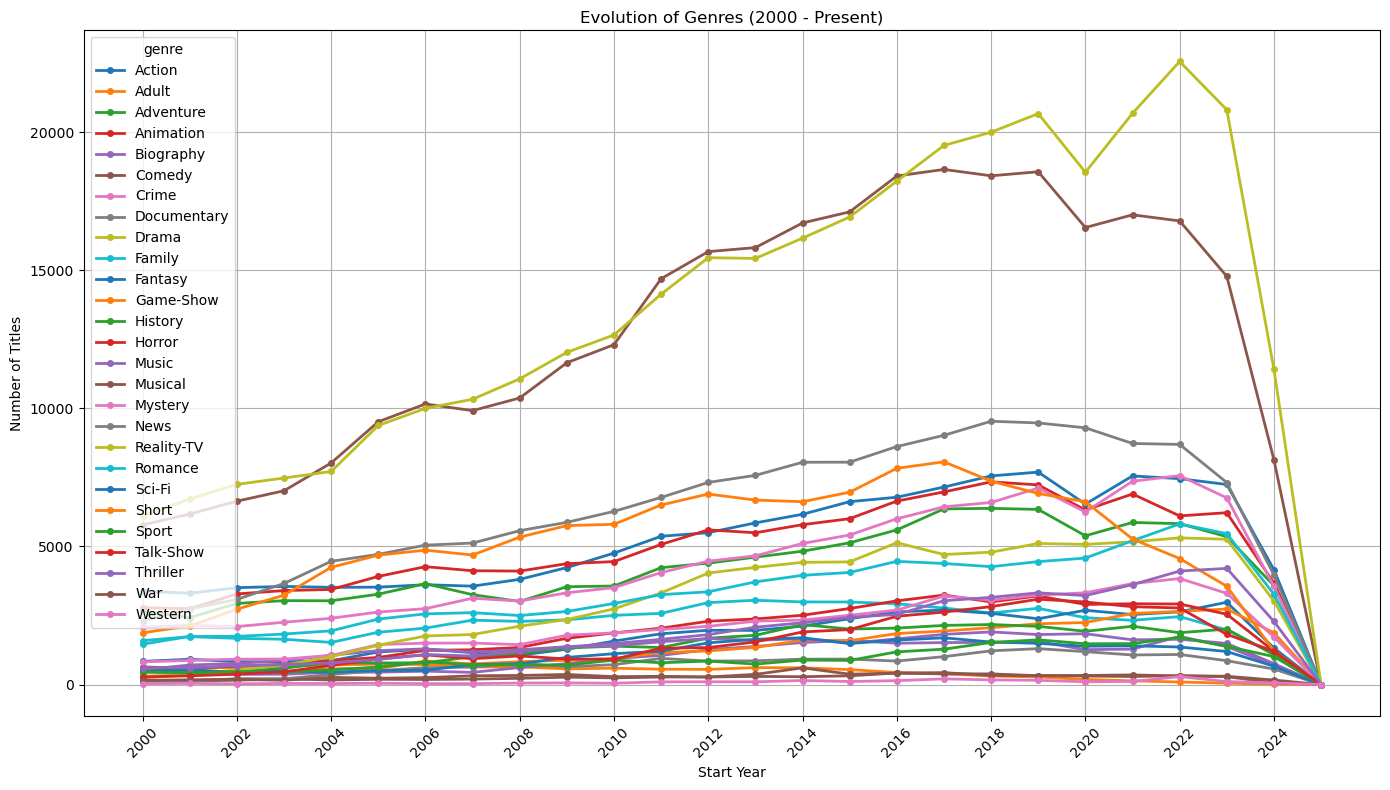

In [434]:
recent_years = title_names_melted[title_names_melted['start_year'] >= 2000] # Limit years
genre_evolution_recent = recent_years.groupby(['start_year', 'genre']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))  # Increased size 
genre_evolution_recent.plot(kind='line', lw=2, figsize=(14, 8), marker='o', markersize=4)
plt.title('Evolution of Genres (2000 - Present)')
plt.xlabel('Start Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.xticks(ticks=range(2000, recent_years['start_year'].max()+1, 2), rotation=45) # Adjusted x-axis ticks to avoid overcrowding
plt.tight_layout()
plt.show()

The decrease in 2024 can be explained by a limited number of films contained in the data set (since the year is not through). It will be disregarded for analysis.

These charts show how different genres have grown in popularity over the years. Drama and Comedy have consistently stayed the most popular genres, while Short Films have seen a decline.

## 5. Results and Findings

Key Insights:
- History, Documentary, and Biography (all non-fiction genres) have the highest average ratings.
- Along with the non-fiction genres, Action and Adventure have seen an increase in ratings in the past few years.
- Drama, Comedy, Documentary, and Action are the most popular genres based on title counts alone. Most film and TV shows fall into the Drama or Comedy category.
- Horror movies and Thrillers currently have the worst average ratings on IMDb.
- There are fewer titles being made in History, Documentary, and Biography genres yet they tend to have high ratings. This could suggest viewers are more interested in and appreciative of non-fiction projects, and with fewer films overall, less competition in these genres to stand out.
- Short films have seen a decrease in popularity and have an average rating lower than other genres. This suggests feature films and TV shows are more profitable now.
- Most genre combinations that have high average ratings include at least one non-fiction genre.

## 6. Recommendations

Based on this analysis, I recommend the following actions for project selection:
- Invest in Documentary, Historical, or Biographical films to increase the likelihood of critical success.
- Invest in projects with genre combinations that bring multiple popular genres together. If one of those genres is non-fiction, it may increase critical success.
- Dramas and Comedies are more common genres and generally tend to rate lower than other genres. Combining a non-fiction genre like History or Biography with genres like Comedy and Drama to create Historical Fiction pieces could be a method for ensuring higher ratings and a wider audience. Invest in films that combine successful genres in unique ways.
- Invest in feature-length films and TV shows rather than short films.

## 7. References

1. [IMDb Non-Commerical Datasets](https://developer.imdb.com/non-commercial-datasets/)